<a href="https://colab.research.google.com/github/Kimi-chuheng/Introduction-to-Statistical-Learning/blob/main/5565_Final_Project_Chuheng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section A


#Part 1: Regression

## Importing packages


In [207]:
!pip install ISLP

In [208]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


## Simple Linear Regression


In [209]:
data = pd.read_csv("online_shoppers_intention.csv")
data.columns


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [210]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [212]:
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)


In [213]:
numeric_data = data.select_dtypes(include=['int64', 'float64', 'bool'])
numeric_data

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0                 1   
1         0.000000   0.100000    0.000000         0.0                 2   
2         0.200000   0.200000    0.000000         0.0                 4   
3         0.050000   0.140000    0.000000         0.0                 3   
4         0.020000   0.050000    0.000000         0.0                 3   
...            ...        ...         ...         ...               ...   
12325     0.007143   0.029031   12.241717         0.0                 4   
12326     0.000000   0.021333    0.000000         0.0                 3   
12327     0.083333   0.086667    0.000000         0.0                 3   
12328     0.000000   0.021053    0.000000         0.0                 2   
12329     0.000000   0.066667    0.000000         0.0                 3   

       Browser  Region  TrafficType  Weekend  Revenue  
0            1       1            1        0        0  
1            2       1            2        0        0  
2            1       9            3        0        0  
3            2       2            4        0        0  
4            3       1            4        1        0  
...        ...     ...          ...      ...      ...  
12325        6       1            1        1        0  
12326        2       1            8        1        0  
12327        2       1           13        1        0  
12328        2       3           11        0        0  
12329        2       1            2        1        0  

[12330 rows x 16 columns]

In [214]:
numeric_data.corr()

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561                -0.014376   
Weekend                        0.026417                 0.014990   
Revenue                        0.138917                 0.093587   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                 1.000000                0.618955   
Informational_Duration        0.618955                1.000000   
ProductRelated                0.374164                0.280046   
ProductRelated_Duration       0.387505                0.347364   
BounceRates                  -0.116114               -0.074067   
ExitRates                    -0.163666               -0.105276   
PageValues                    0.048632                0.030861   
SpecialDay                   -0.048219               -0.030577   
OperatingSystems             -0.009527               -0.009579   
Browser                      -0.038235               -0.019285   
Region                       -0.029169               -0.027144   
TrafficType                  -0.034491               -0.024675   
Weekend                       0.035785                0.024078   
Revenue                       0.095200                0.070345   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.431119                 0.373939    -0.223563   
Administrative_Duration        0.289087                 0.355422    -0.144170   
Informational                  0.374164                 0.387505    -0.116114   
Informational_Duration         0.280046                 0.347364    -0.074067   
ProductRelated                 1.000000                 0.860927    -0.204578   
ProductRelated_Duration        0.860927                 1.000000    -0.184541   
BounceRates                   -0.204578                -0.184541     1.000000   
ExitRates                     -0.292526                -0.251984     0.913004   
PageValues                     0.056282                 0.052823    -0.119386   
SpecialDay                    -0.023958                -0.036380     0.072702   
OperatingSystems               0.004290                 0.002976     0.023823   
Browser                       -0.013146                -0.007380    -0.015772   
Region                        -0.038122                -0.033091    -0.006485   
TrafficType                   -0.043064                -0.036377     0.078286   
Weekend                        0.016092                 0.007311    -0.046514   
Revenue                        0.158538                 0.152373    -0.150673   

                         ExitRates  PageValues  SpecialDay  OperatingSystems  \
Administrative           -0.316483    0.098990   -0.094778         -0.006347   
Administrative_Duration  -0.205798    0.067608   -0.073304         -0.007343   
Informational            -0.163666    0.048632   -0.048219         -0.009527   
Informational_Duration   -0.105276    0.030861 

In my subsequent work, I encountered a very strange phenomenon:

The performance of the training set was much worse than that of the test set. After careful investigation, I found that there were some highly influential outliers in the `ProductRelated` column. When these outliers were included in the training set, it led to the above-mentioned odd result. Therefore, I chose to remove the outliers. If I were to remove outliers from all columns, it would result in the removal of a large portion of the data. Given that our linear regression mainly focuses on `ProductRelated` and `ProductRelated_Duration`, I decided to remove outliers only from the `ProductRelated` column.

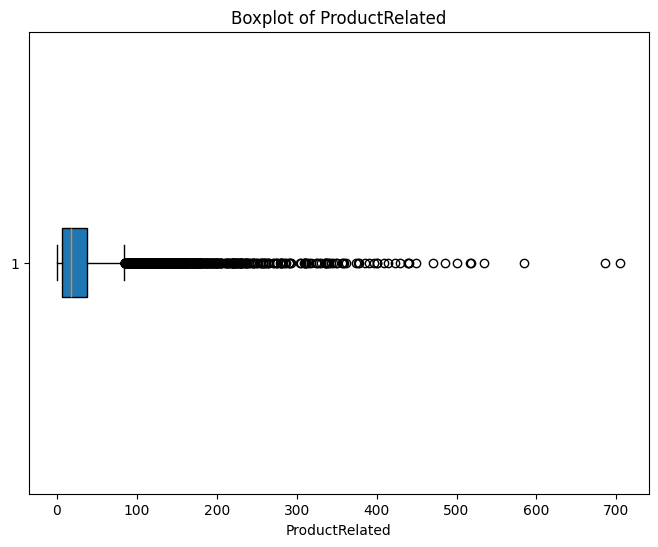

ProductRelated quantiles:
0.25     7.0
0.50    18.0
0.75    38.0
Name: ProductRelated, dtype: float64
ProductRelated maximum value: 705


In [215]:

# Plot the boxplot for the 'ProductRelated' column
plt.figure(figsize=(8, 6))
plt.boxplot(numeric_data['ProductRelated'], vert=False, patch_artist=True)  # horizontal boxplot with colored box
plt.title('Boxplot of ProductRelated')
plt.xlabel('ProductRelated')
plt.show()

# Calculate and print the quantiles and the maximum value for the 'ProductRelated' column
quantiles = numeric_data['ProductRelated'].quantile([0.25, 0.5, 0.75])  # 25th, 50th (median), and 75th percentiles
max_value = numeric_data['ProductRelated'].max()  # maximum value in 'ProductRelated'

# Print the quantiles and maximum value
print("ProductRelated quantiles:")
print(quantiles)
print("ProductRelated maximum value:", max_value)


In [216]:
#Check for outlier

numeric_columns = ['Administrative', 'Administrative_Duration', 'Informational',
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems','Browser','Region','TrafficType']
for col in numeric_columns:
    mean = numeric_data[col].mean()
    std = numeric_data[col].std()
    z_scores = np.abs((numeric_data[col] - mean) / std)
    outliers = (z_scores >= 3).sum()
    print(f"{col}: {outliers} outliers ({outliers/len(numeric_data)*100:.2f}%)")

Administrative: 213 outliers (1.73%)
Administrative_Duration: 232 outliers (1.88%)
Informational: 260 outliers (2.11%)
Informational_Duration: 230 outliers (1.87%)
ProductRelated: 236 outliers (1.91%)
ProductRelated_Duration: 219 outliers (1.78%)
BounceRates: 708 outliers (5.74%)
ExitRates: 713 outliers (5.78%)
PageValues: 259 outliers (2.10%)
SpecialDay: 479 outliers (3.88%)
OperatingSystems: 111 outliers (0.90%)
Browser: 376 outliers (3.05%)
Region: 0 outliers (0.00%)
TrafficType: 226 outliers (1.83%)


In [217]:
def remove_outliers(df, columns, n_std=3):
    """
    Using Z-score
    """
    df_clean = df.copy()
    mask = pd.Series(True, index=df.index)

    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        z_scores = np.abs((df[col] - mean) / std)
        mask &= (z_scores < n_std)

    return df_clean[mask]




print("Original size:", len(numeric_data))


numeric_data = remove_outliers(numeric_data,  ['ProductRelated'])

print("Cleaned size:", len(numeric_data))

Original size: 12330
Cleaned size: 12094


In [218]:
X = pd.DataFrame({'intercept': np.ones(numeric_data.shape[0]),
                  'ProductRelated': numeric_data['ProductRelated']})
X[:4]
X.shape

(12094, 2)

Extract the response, and fit the model.

In [219]:
y = numeric_data['ProductRelated_Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6625)

# Check the shape of the resulting datasets
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

model = sm.OLS(y_train, X_train)
results = model.fit()


Training set size: (8465, 2)
Test set size: (3629, 2)


In [220]:
summarize(results)


coef  std err        t  P>|t|
intercept       65.9825   11.177    5.903    0.0
ProductRelated  35.4093    0.276  128.340    0.0

In [221]:
y_pred = results.predict(X_test)


print("Predicted values:", y_pred[:5])
print("Actual values:", y_test[:5])

Predicted values: 3323      455.485212
2093     3429.869469
12006     597.122557
5082      880.397248
5164      207.619857
dtype: float64
Actual values: 3323      578.000000
2093     4990.959524
12006     658.750000
5082     1146.500000
5164       26.000000
Name: ProductRelated_Duration, dtype: float64


In [222]:
y_train_pred = results.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

mse_train = mean_squared_error(y_train, y_train_pred)

print(f"R^2 on training set: {r2_train}")
print(f"MSE on training set: {mse_train}")

R^2 on training set: 0.6605868222564342
MSE on training set: 568434.7631976975


In [223]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


test_r_squared = r2_score(y_test, y_pred)
print(f"Test R-squared: {test_r_squared}")

Mean Squared Error: 602494.24916781
Root Mean Squared Error: 776.2050303674989
Test R-squared: 0.6500600295524273


### Using Transformations: Fit and Transform



In [224]:
design = MS(['ProductRelated'])
design = design.fit(numeric_data)
X = design.transform(numeric_data)
X[:4]

intercept  ProductRelated
0        1.0               1
1        1.0               2
2        1.0               1
3        1.0               2

In [225]:
design = MS(['ProductRelated'])
X = design.fit_transform(numeric_data)
X[:4]

intercept  ProductRelated
0        1.0               1
1        1.0               2
2        1.0               1
3        1.0               2

In [226]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     ProductRelated_Duration   R-squared:                       0.661
Model:                                 OLS   Adj. R-squared:                  0.661
Method:                      Least Squares   F-statistic:                 1.647e+04
Date:                     Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                             02:34:01   Log-Likelihood:                -68095.
No. Observations:                     8465   AIC:                         1.362e+05
Df Residuals:                         8463   BIC:                         1.362e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         65.9825     11.177      5.903      0.000      44.072      87.893
ProductRelated    35.4093      0.276    128.340      0.000      34.869      35.950
==============================================================================
Omnibus:                     4721.552   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80366.781
Skew:                           2.311   Prob(JB):                         0.00
Kurtosis:                      17.370   Cond. No.                         55.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
results.params


intercept         65.982511
ProductRelated    35.409336
dtype: float64

The `get_prediction()`  method can be used to obtain predictions, and produce confidence intervals and
prediction intervals for the prediction of  `ProductRelated_Duration`  for  given values of  `ProductRelated`.

In [228]:
new_df = pd.DataFrame({'ProductRelated':[5, 10, 15]})
newX = design.transform(new_df)
newX


intercept  ProductRelated
0        1.0               5
1        1.0              10
2        1.0              15

Next compute the predictions at `newX`, and view them by extracting the `predicted_mean` attribute.

In [229]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean


array([243.02919328, 420.07587524, 597.12255721])

Produce confidence intervals for the predicted values.

In [230]:
new_predictions.conf_int(alpha=0.05)


array([[222.85992219, 263.19846437],
       [401.41683457, 438.73491592],
       [579.68279645, 614.56231797]])

Prediction intervals:

In [231]:
new_predictions.conf_int(obs=True, alpha=0.05)


array([[-1235.20165776,  1721.26004431],
       [-1058.13514124,  1898.28689173],
       [ -881.07357142,  2075.31868585]])

 For instance, the 95% confidence interval associated with an
 `ProductRelated`  value of 10 is (401.41683457, 438.73491592), and the 95% prediction
interval is (-1058.13514124,  1898.28689173).  As expected, the confidence and
prediction intervals are centered around the same point (a predicted
value of 420 for  `ProductRelated_Duration`  when  `ProductRelated`  equals
10), but the latter are substantially wider.

Next we will plot  `ProductRelated_Duration`  and  `ProductRelated`
using `DataFrame.plot.scatter()`, \definelongblankMR{plot.scatter()}{plot.slashslashscatter()}
and wish to
add the regression line to the resulting plot.

### Defining Functions
While there is a function
within the `ISLP` package that adds a line to an existing plot, we take this opportunity
to define our first function to do so.

In [232]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)


In [233]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


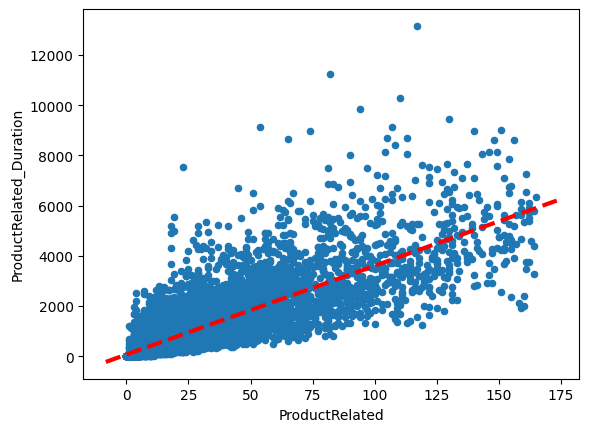

In [234]:
ax = pd.DataFrame({'ProductRelated': X_train['ProductRelated'],
                  'ProductRelated_Duration': y_train}).plot.scatter('ProductRelated', 'ProductRelated_Duration')
abline(ax,
       results.params.iloc[0],
       results.params.iloc[1],
       'r--',
       linewidth=3)

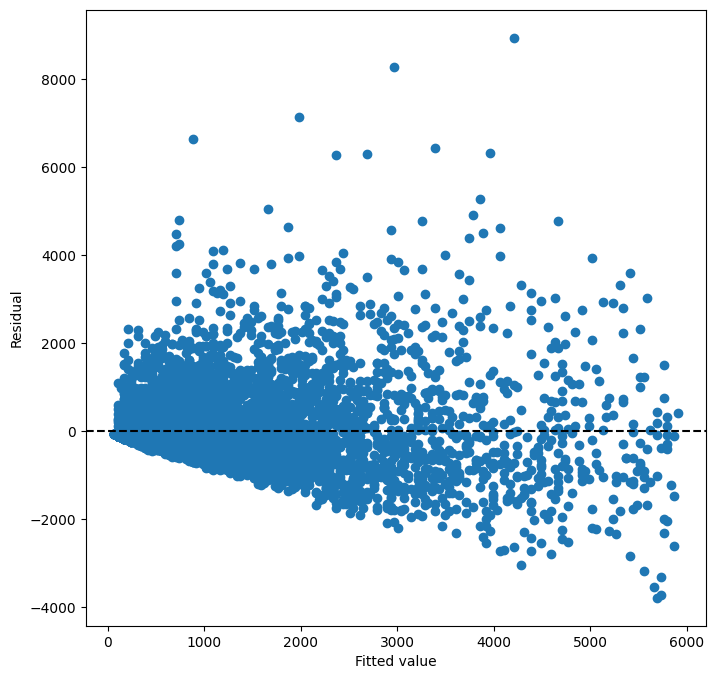

In [235]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


4142

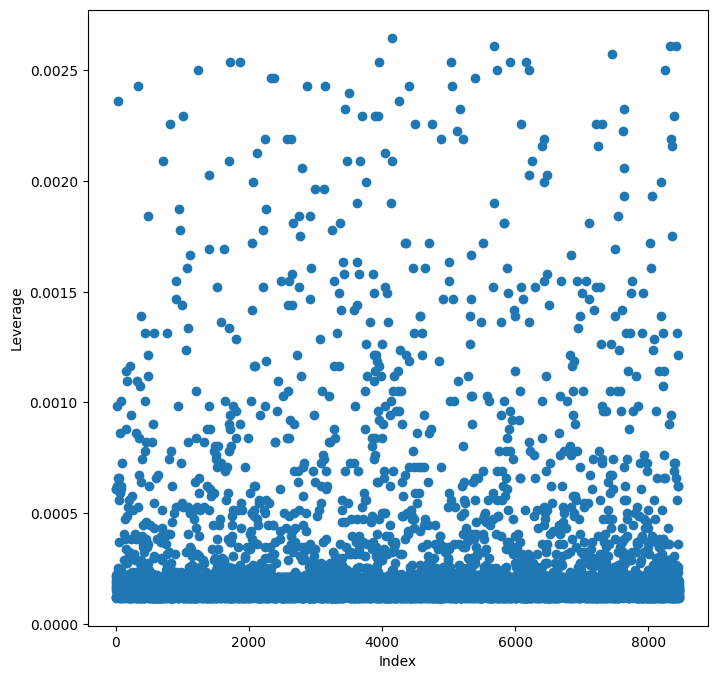

In [236]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X_train.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


**Summary**:
From the results of the training and testing sets, the linear model demonstrates moderate performance, indicating some degree of linear relationship in the data, albeit not a strong one. The residual plot shows that residuals are relatively randomly distributed around the zero line, but there are some boundary effects and patterns. This suggests that the model has room for improvement. Future enhancements could involve exploring polynomial regression, spline methods, or other techniques for comparison and optimization.

## Multiple Linear Regression


In [237]:
X = MS(['ProductRelated', 'Informational']).fit_transform(numeric_data)
y = numeric_data['ProductRelated_Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6625)

# Check the shape of the resulting datasets
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

model1 = sm.OLS(y_train, X_train)
results1 = model1.fit()
summarize(results1)

Training set size: (8465, 3)
Test set size: (3629, 3)


coef  std err        t  P>|t|
intercept       58.8857   11.149    5.282    0.0
ProductRelated  34.5355    0.291  118.878    0.0
Informational   67.2885    7.314    9.200    0.0

In [238]:
terms = numeric_data.columns.drop('ProductRelated_Duration')
terms


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'Weekend', 'Revenue'],
      dtype='object')

Now fit the model with all the variables in `terms` using
the same model matrix builder.

In [239]:
X = MS(terms).fit_transform(numeric_data)
y = numeric_data['ProductRelated_Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6625)
model = sm.OLS(y_train, X_train)
results = model.fit()
summarize(results)


coef  std err        t  P>|t|
intercept                  -6.1124   30.114   -0.203  0.839
Administrative            -18.1632    3.536   -5.137  0.000
Administrative_Duration     0.6218    0.060   10.389  0.000
Informational              17.1870    9.042    1.901  0.057
Informational_Duration      0.6450    0.077    8.419  0.000
ProductRelated             34.4654    0.322  107.051  0.000
BounceRates             -1376.1775  417.317   -3.298  0.001
ExitRates                1023.6465  441.723    2.317  0.021
PageValues                 -0.2393    0.490   -0.488  0.625
SpecialDay                -89.5963   40.890   -2.191  0.028
OperatingSystems            2.9067    9.128    0.318  0.750
Browser                     5.2326    4.882    1.072  0.284
Region                      8.4709    3.381    2.505  0.012
TrafficType                 0.8934    2.052    0.435  0.663
Weekend                   -21.2277   19.177   -1.107  0.268
Revenue                    71.0256   26.650    2.665  0.008

In the above regression output,   `OperatingSystems`  has a high $p$-value.
So we may wish to run a regression excluding this predictor.
The following syntax results in a regression using all predictors except  `OperatingSystems`.

In [240]:
minus_age = numeric_data.columns.drop(['ProductRelated_Duration', 'OperatingSystems'])
Xma = MS(minus_age).fit_transform(numeric_data)
X_train, X_test, y_train, y_test = train_test_split(Xma, y, test_size=0.3, random_state=6625)
model1 = sm.OLS(y_train, X_train)
summarize(model1.fit())


coef  std err        t  P>|t|
intercept                  -1.3295   26.100   -0.051  0.959
Administrative            -18.1615    3.536   -5.137  0.000
Administrative_Duration     0.6217    0.060   10.389  0.000
Informational              17.2201    9.041    1.905  0.057
Informational_Duration      0.6448    0.077    8.417  0.000
ProductRelated             34.4664    0.322  107.065  0.000
BounceRates             -1373.1997  417.190   -3.292  0.001
ExitRates                1020.9088  441.616    2.312  0.021
PageValues                 -0.2374    0.490   -0.484  0.628
SpecialDay                -89.6674   40.888   -2.193  0.028
Browser                     5.5691    4.766    1.169  0.243
Region                      8.5157    3.378    2.521  0.012
TrafficType                 1.0086    2.020    0.499  0.618
Weekend                   -21.1155   19.173   -1.101  0.271
Revenue                    70.7659   26.636    2.657  0.008

In [241]:
y_train_pred = model1.fit().predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

mse_train = mean_squared_error(y_train, y_train_pred)

print(f"R^2 on training set: {r2_train}")
print(f"MSE on training set: {mse_train}")

R^2 on training set: 0.6725013199566566
MSE on training set: 548480.8688796569


In [242]:
y_pred = model1.fit().predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 575999.9566088599
R-squared: 0.6654484120439023


**Summary** :After attempting a multiple linear regression model using all variables except `ProductRelated_Duration` and `OperatingSystems` as predictors, I observed a slight improvement in performance. However, the results remain unsatisfactory. I believe the model is still underfitting, as the complexity of the relationships in the data likely exceeds the linear assumptions of the model. This suggests that the capabilities of multiple linear regression are inherently limited for capturing such intricate patterns.

## Multivariate Goodness of Fit
We can access regression results like
R
2
  and RSE directly by name, use variance inflation factors (VIFs) to assess collinearity in regression, and leverage Python's list comprehensions for efficiently transforming sequences, such as computing VIFs for all features in a model matrix.

In [243]:
vals = [VIF(X_train, i)
        for i in range(1, X_train.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X_train.columns[1:])
vif


vif
Administrative           1.914500
Administrative_Duration  1.603723
Informational            1.753283
Informational_Duration   1.561009
ProductRelated           1.408761
BounceRates              6.331183
ExitRates                7.119389
PageValues               1.373107
SpecialDay               1.028636
Browser                  1.034997
Region                   1.017580
TrafficType              1.031617
Weekend                  1.008398
Revenue                  1.397500

The function `VIF()` takes two arguments: a dataframe or array,
and a variable column index. VIF stands for Variance Inflation Factor

In [244]:
vals = []
for i in range(1, X_train.values.shape[1]):
    vals.append(VIF(X_train.values, i))



## Interaction Terms


In [245]:
X = MS(['ProductRelated',
        'Informational',
        ('ProductRelated', 'Informational')]).fit_transform(numeric_data)

y = numeric_data['ProductRelated_Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6625)

model2 = sm.OLS(y_train, X_train)
summarize(model2.fit())

coef  std err        t  P>|t|
intercept                     64.9288   11.821    5.493  0.000
ProductRelated                34.3088    0.326  105.315  0.000
Informational                 54.1623   11.240    4.819  0.000
ProductRelated:Informational   0.2594    0.169    1.538  0.124

Based on the results, the interaction term ProductRelated:Informational has a coefficient of 0.2594 with a p-value of 0.124, indicating there is litter statistically significant impact on the target variable. Therefore, **the interaction term should not be included in the model**

## Non-linear Transformations of the Predictors(Polynomial Regression)


In [246]:
X = MS([poly('ProductRelated', degree=2), 'Informational']).fit_transform(numeric_data)
y = numeric_data['ProductRelated_Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6625)
model3 = sm.OLS(y_train, X_train)
results3 = model3.fit()
summarize(results3)


coef  std err        t  P>|t|
intercept                            1006.1917    8.799  114.357    0.0
poly(ProductRelated, degree=2)[0]  112600.0000  944.218  119.295    0.0
poly(ProductRelated, degree=2)[1]   -6572.8112  889.231   -7.392    0.0
Informational                          66.0885    7.292    9.063    0.0

In [247]:
y_train_pred = results3.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

mse_train = mean_squared_error(y_train, y_train_pred)

print(f"R^2 on training set: {r2_train}")
print(f"MSE on training set: {mse_train}")

R^2 on training set: 0.6661043921295882
MSE on training set: 559194.1717005617


In [248]:
y_pred = results3.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(f"R^2 on test set: {r2}")
print(f"MSE on test set: {mse}")

R^2 on test set: 0.6541200676005277
MSE on test set: 595504.0514711754



We use the `anova_lm()` function to further quantify the extent to which the quadratic fit is
superior to the linear fit.

In [249]:
anova_lm(results1, results3)


df_resid           ssr  df_diff       ss_diff         F        Pr(>F)
0    8462.0  4.764145e+09      0.0           NaN       NaN           NaN
1    8461.0  4.733579e+09      1.0  3.056619e+07  54.63531  1.589312e-13

Here `results1` represents the linear submodel
while `results3` corresponds to the larger model above  with a quadratic
term in `ProductRelated`.
The `anova_lm()` function performs a hypothesis test
comparing the two models. The null hypothesis is that the quadratic
term in the bigger model is not needed, and the alternative hypothesis is that the
bigger model is superior. Here the *F*-statistic is 54.64 and
the associated *p*-value is zero.
In this case the *F*-statistic is the square of the
*t*-statistic for the quadratic term in the linear model summary
for `results3` --- a consequence of the fact that these nested
models differ by one degree of freedom.
This provides very clear evidence that the quadratic polynomial in
`ProductRelated` improves the linear model.


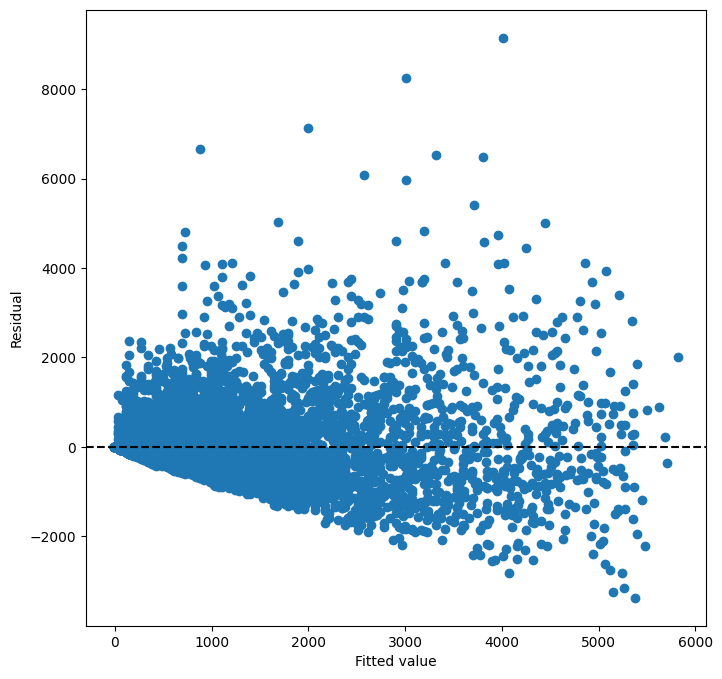

In [250]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


We see that when the quadratic term is included in the model,
there is little discernible pattern in the residuals.
In order to create a cubic or higher-degree polynomial fit, we can simply change the degree argument
to `poly()`.


Now change degree of `ProductRelated` to 5.

In [251]:
X = MS([poly('ProductRelated', degree=5), 'Informational']).fit_transform(numeric_data)
y = numeric_data['ProductRelated_Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6625)
model3 = sm.OLS(y_train, X_train)
results3 = model3.fit()
summarize(results3)


coef  std err        t  P>|t|
intercept                            1006.4240    8.798  114.392  0.000
poly(ProductRelated, degree=5)[0]  112700.0000  944.245  119.345  0.000
poly(ProductRelated, degree=5)[1]   -6513.0074  889.625   -7.321  0.000
poly(ProductRelated, degree=5)[2]    -807.3150  886.656   -0.911  0.363
poly(ProductRelated, degree=5)[3]   -2058.2081  879.623   -2.340  0.019
poly(ProductRelated, degree=5)[4]    -672.3771  883.799   -0.761  0.447
Informational                          65.9222    7.293    9.039  0.000

In [252]:
y_train_pred = results3.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)

mse_train = mean_squared_error(y_train, y_train_pred)

print(f"R^2 on training set: {r2_train}")
print(f"MSE on training set: {mse_train}")

R^2 on training set: 0.6663873344423452
MSE on training set: 558720.3119417276


In [253]:
y_pred = results3.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(f"R^2 on test set: {r2}")
print(f"MSE on test set: {mse}")

R^2 on test set: 0.6543531547104997
MSE on test set: 595102.7436607709


**Summary**:In polynomial regression, I added a quadratic term for `ProductRelated` and used the `anova_lm()` function to quantify the improvement of the quadratic fit over the linear fit. The results showed only a slight improvement, indicating that while some nonlinearity exists in the relationship, it is not sufficient to significantly enhance model performance. Subsequently, I attempted a fifth-order polynomial fit, but the improvement remained negligible. This suggests that the complex relationships in the data cannot be effectively captured by polynomial transformations of a single variable and may involve higher-dimensional interactions beyond the capacity of simple regression models.

#Part 2: Feature Selection / Model Optimization Methods

In [254]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP.models import ModelSpec as MS
from functools import partial

##Forward Selection

In [255]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)

In [256]:
numeric_data = numeric_data.dropna();
numeric_data.shape

(12094, 16)

Choose the best model using forward selection based on $C_p$

In [257]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n


Estimate the residual variance $\sigma^2$

In [258]:
design = MS(numeric_data.columns.drop('ProductRelated_Duration')).fit(numeric_data)
Y = np.array(numeric_data['ProductRelated_Duration'])
X = design.transform(numeric_data)
sigma2 = OLS(Y,X).fit().scale


In [259]:
neg_Cp = partial(nCp, sigma2)


We can now use `neg_Cp()` as a scorer for model selection.


In [260]:
strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))


In [261]:
data_MSE = sklearn_selected(OLS,
                               strategy)
data_MSE.fit(numeric_data, Y)
data_MSE.selected_state_

('Administrative',
 'Administrative_Duration',
 'BounceRates',
 'Browser',
 'ExitRates',
 'Informational',
 'Informational_Duration',
 'OperatingSystems',
 'PageValues',
 'ProductRelated',
 'Region',
 'Revenue',
 'SpecialDay',
 'TrafficType',
 'Weekend')

All 15 variables will be selected

Using `neg_Cp` results in a smaller model, as expected, with just 11 variables selected.

In [262]:

data_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
data_Cp.fit(numeric_data, Y)
data_Cp.selected_state_

('Administrative',
 'Administrative_Duration',
 'BounceRates',
 'ExitRates',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'Region',
 'Revenue',
 'SpecialDay',
 'Weekend')

### Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [263]:
strategy = Stepwise.fixed_steps(design,
                                len(design.terms),
                                direction='forward')
full_path = sklearn_selection_path(OLS, strategy)

We now fit the full forward-selection path on the numerical data and compute the fitted values.

In [264]:
full_path.fit(numeric_data, Y)
Yhat_in = full_path.predict(numeric_data)
Yhat_in.shape


(12094, 16)

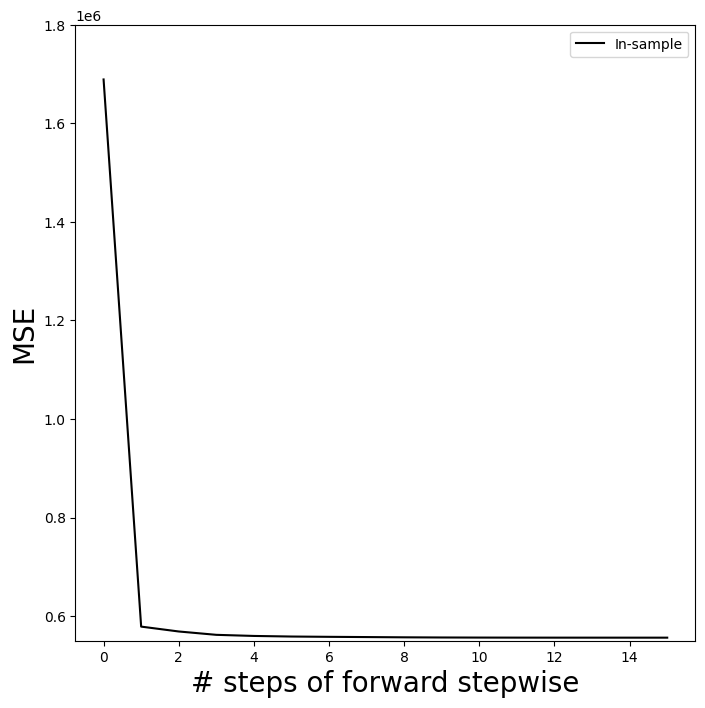

In [265]:
mse_fig, ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
        insample_mse,
        'k', # color black
        label='In-sample')
ax.set_ylabel('MSE',
              fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
              fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax.set_ylim([550000,1800000]);


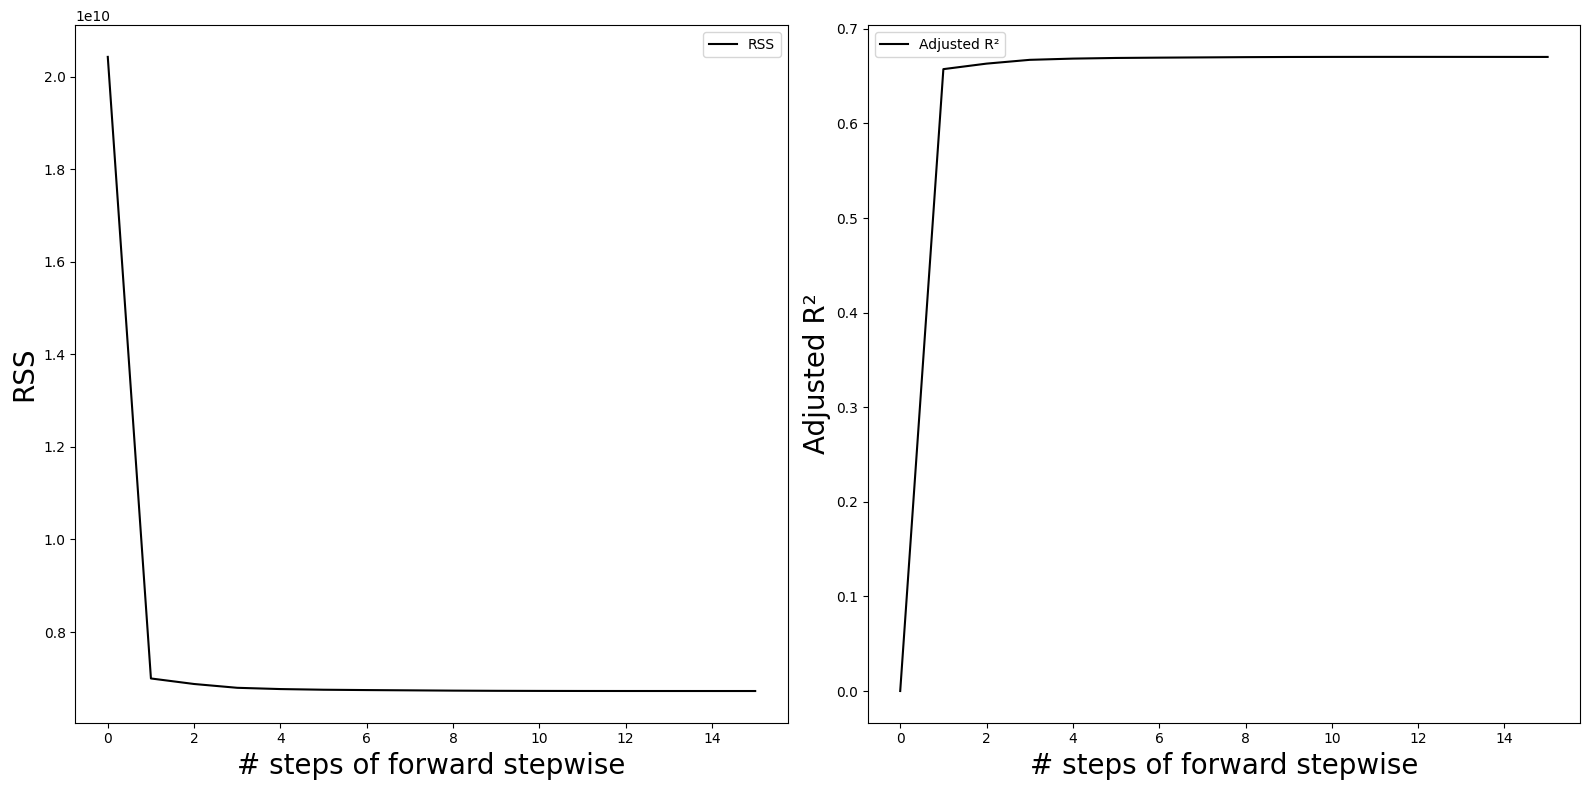

In [266]:
# Plot RSS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Calculate RSS
rss = ((Yhat_in - Y[:,None])**2).sum(0)
n_steps = rss.shape[0]

# RSS Plot
ax1.plot(np.arange(n_steps), rss, 'k', label='RSS')
ax1.set_ylabel('RSS', fontsize=20)
ax1.set_xlabel('# steps of forward stepwise', fontsize=20)
ax1.set_xticks(np.arange(n_steps)[::2])
ax1.legend()

# Calculate Adjusted R²
n = Y.shape[0]
p = np.arange(n_steps)
tss = np.sum((Y - np.mean(Y))**2)
r2 = 1 - rss/tss
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

# Adjusted R² Plot
ax2.plot(np.arange(n_steps), adj_r2, 'k', label='Adjusted R²')
ax2.set_ylabel('Adjusted R²', fontsize=20)
ax2.set_xlabel('# steps of forward stepwise', fontsize=20)
ax2.set_xticks(np.arange(n_steps)[::2])
ax2.legend()

plt.tight_layout()


The graph shows that adding features initially improves model performance quickly, but as more features are added, the improvement in MSE becomes minimal, indicating diminishing returns.

In [267]:
K = 5
kfold = skm.KFold(K,
                  random_state=6625,
                  shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path,
                                numeric_data,
                                Y,
                                cv=kfold)
Yhat_cv.shape


(12094, 16)

In [268]:
cv_mse = []
for train_idx, test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx] - Y[test_idx,None])**2
    cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
cv_mse.shape


(16, 5)

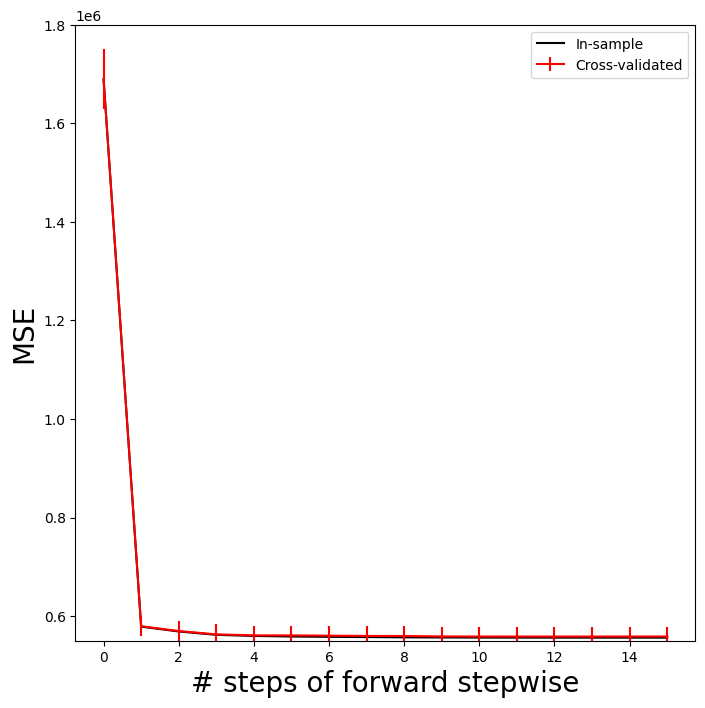

In [269]:
ax.errorbar(np.arange(n_steps),
            cv_mse.mean(1),
            cv_mse.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r') # color red
ax.set_ylim([550000,1800000])
ax.legend()
mse_fig


Try to zoom in

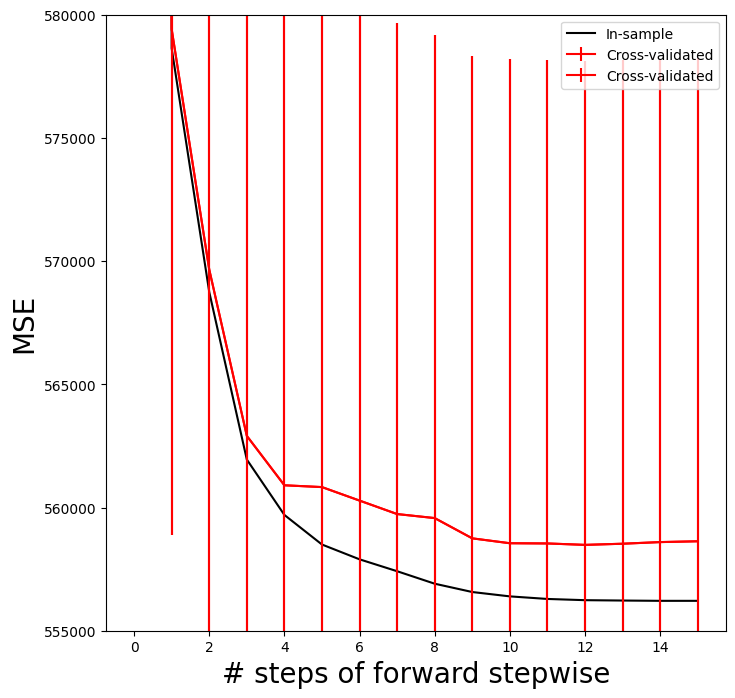

In [270]:
ax.errorbar(np.arange(n_steps),
            cv_mse.mean(1),
            cv_mse.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r') # color red
ax.set_ylim([555000,580000])
ax.legend()
mse_fig


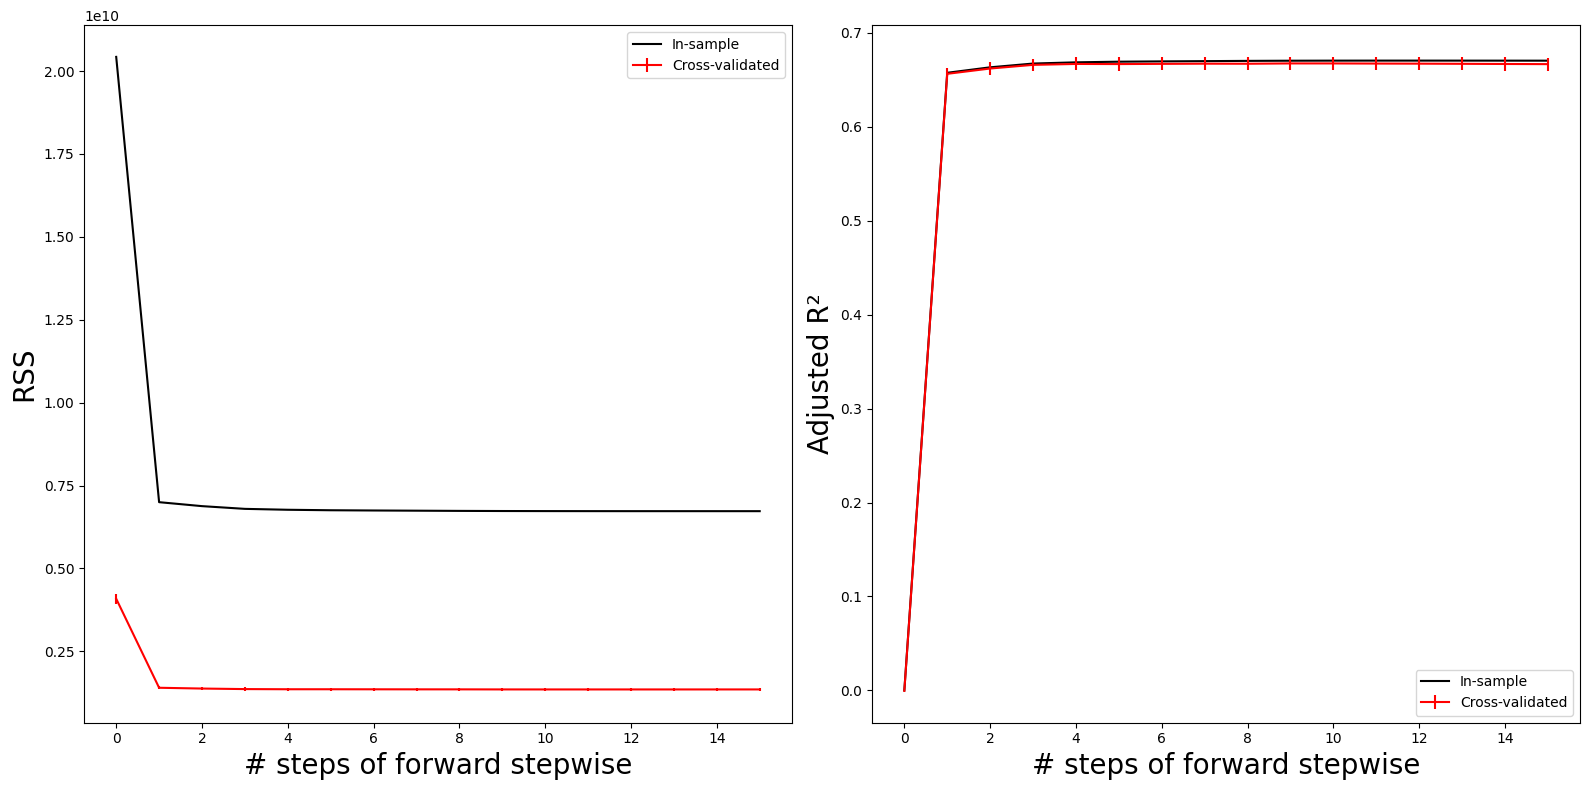

In [271]:
# Calculate cross-validated RSS and R² values
cv_rss = []
cv_adj_r2 = []

for train_idx, test_idx in kfold.split(Y):
    # RSS calculation for CV
    errors = (Yhat_cv[test_idx] - Y[test_idx,None])**2
    fold_rss = errors.sum(0)
    cv_rss.append(fold_rss)

    # Adjusted R² calculation for CV
    n_test = len(test_idx)
    p = np.arange(n_steps)
    tss_test = np.sum((Y[test_idx] - np.mean(Y[test_idx]))**2)
    r2_test = 1 - fold_rss/tss_test
    adj_r2_test = 1 - (1-r2_test)*(n_test-1)/(n_test-p-1)
    cv_adj_r2.append(adj_r2_test)

# Convert to numpy arrays
cv_rss = np.array(cv_rss).T
cv_adj_r2 = np.array(cv_adj_r2).T

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# RSS Plot
# In-sample RSS
rss = ((Yhat_in - Y[:,None])**2).sum(0)
ax1.plot(np.arange(n_steps), rss, 'k', label='In-sample')

# Cross-validated RSS
ax1.errorbar(np.arange(n_steps),
            cv_rss.mean(1),
            cv_rss.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r')
ax1.set_ylabel('RSS', fontsize=20)
ax1.set_xlabel('# steps of forward stepwise', fontsize=20)
ax1.set_xticks(np.arange(n_steps)[::2])
ax1.legend()

# Adjusted R² Plot
# In-sample Adjusted R²
n = Y.shape[0]
p = np.arange(n_steps)
tss = np.sum((Y - np.mean(Y))**2)
r2 = 1 - rss/tss
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
ax2.plot(np.arange(n_steps), adj_r2, 'k', label='In-sample')

# Cross-validated Adjusted R²
ax2.errorbar(np.arange(n_steps),
            cv_adj_r2.mean(1),
            cv_adj_r2.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r')
ax2.set_ylabel('Adjusted R²', fontsize=20)
ax2.set_xlabel('# steps of forward stepwise', fontsize=20)
ax2.set_xticks(np.arange(n_steps)[::2])
ax2.legend()

plt.tight_layout()

To repeat the above using the validation set approach, we simply change our
`cv` argument to a validation set: one random split of the data into a test and training. We choose a test size
of 30%, similar to the size of each test set in 5-fold cross-validation.`skm.ShuffleSplit()`

In [272]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.3,
                              random_state=6625)
for train_idx, test_idx in validation.split(Y):
    full_path.fit(numeric_data.iloc[train_idx],
                  Y[train_idx])
    Yhat_val = full_path.predict(numeric_data.iloc[test_idx])
    errors = (Yhat_val - Y[test_idx,None])**2
    validation_mse = errors.mean(0)


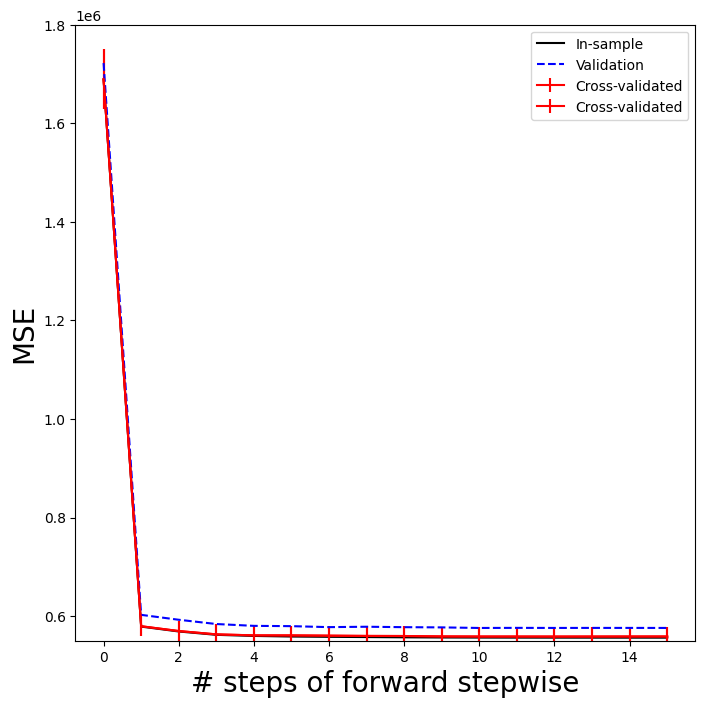

In [273]:
ax.plot(np.arange(n_steps),
        validation_mse,
        'b--', # color blue, broken line
        label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
ax.set_ylim([550000,1800000])
ax.legend()
mse_fig


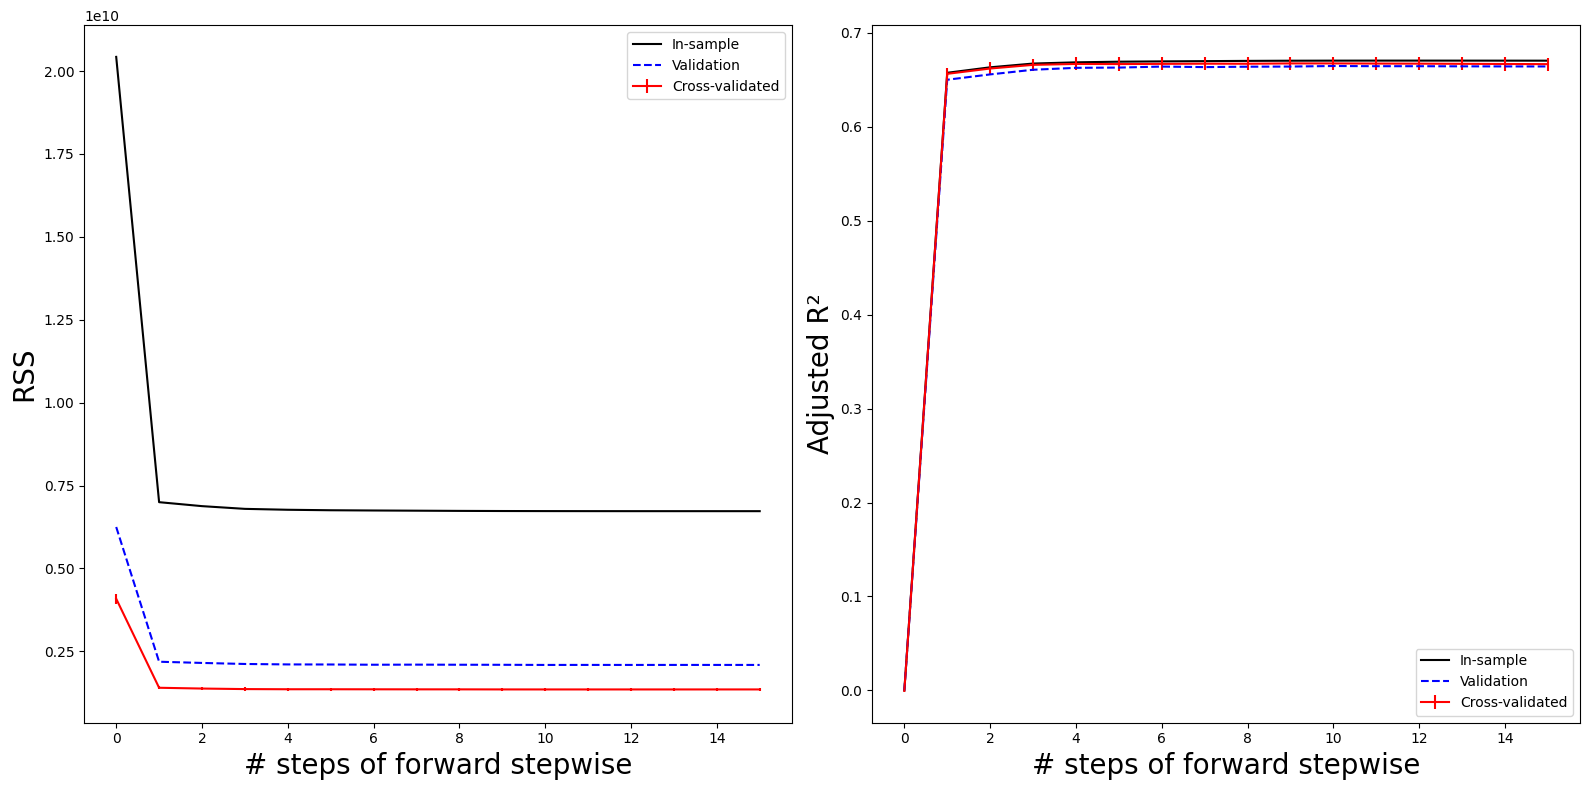

In [274]:
# Calculate validation metrics
for train_idx, test_idx in validation.split(Y):
    full_path.fit(numeric_data.iloc[train_idx],
                 Y[train_idx])

    Yhat_val = full_path.predict(numeric_data.iloc[test_idx])

    # Calculate validation RSS
    errors = (Yhat_val - Y[test_idx,None])**2
    validation_rss = errors.sum(0)

    # Calculate validation Adjusted R²
    n_val = len(test_idx)
    p = np.arange(n_steps)
    tss_val = np.sum((Y[test_idx] - np.mean(Y[test_idx]))**2)
    r2_val = 1 - validation_rss/tss_val
    validation_adj_r2 = 1 - (1-r2_val)*(n_val-1)/(n_val-p-1)

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# RSS Plot
# In-sample RSS
rss = ((Yhat_in - Y[:,None])**2).sum(0)
ax1.plot(np.arange(n_steps), rss, 'k', label='In-sample')

# Cross-validated RSS
ax1.errorbar(np.arange(n_steps),
            cv_rss.mean(1),
            cv_rss.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r')

# Validation RSS
ax1.plot(np.arange(n_steps),
         validation_rss,
         'b--',
         label='Validation')

ax1.set_ylabel('RSS', fontsize=20)
ax1.set_xlabel('# steps of forward stepwise', fontsize=20)
ax1.set_xticks(np.arange(n_steps)[::2])
ax1.legend()

# Adjusted R² Plot
# In-sample Adjusted R²
n = Y.shape[0]
p = np.arange(n_steps)
tss = np.sum((Y - np.mean(Y))**2)
r2 = 1 - rss/tss
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
ax2.plot(np.arange(n_steps), adj_r2, 'k', label='In-sample')

# Cross-validated Adjusted R²
ax2.errorbar(np.arange(n_steps),
            cv_adj_r2.mean(1),
            cv_adj_r2.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r')

# Validation Adjusted R²
ax2.plot(np.arange(n_steps),
         validation_adj_r2,
         'b--',
         label='Validation')

ax2.set_ylabel('Adjusted R²', fontsize=20)
ax2.set_xlabel('# steps of forward stepwise', fontsize=20)
ax2.set_xticks(np.arange(n_steps)[::2])
ax2.legend()

plt.tight_layout()

##Backward Selection

In [275]:
numeric_data = numeric_data.dropna();
numeric_data.shape

(12094, 16)

Choose the best model using forward selection based on $C_p$

In [276]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n


Estimate the residual variance $\sigma^2$

In [277]:
design = MS(numeric_data.columns.drop('ProductRelated_Duration')).fit(numeric_data)
Y = np.array(numeric_data['ProductRelated_Duration'])
X = design.transform(numeric_data)
sigma2 = OLS(Y,X).fit().scale


In [278]:
neg_Cp = partial(nCp, sigma2)


We can now use `neg_Cp()` as a scorer for model selection.


In [279]:
strategy = Stepwise.first_peak(design,initial_terms=design.terms,
                               direction='backward',
                               min_terms = 1)


In [280]:
data_MSE = sklearn_selected(OLS,
                               strategy)
data_MSE.fit(numeric_data, Y)
data_MSE.selected_state_

('Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'Revenue')

All 15 variables will be selected

Using `neg_Cp` results in a smaller model, as expected, with just 11 variables selected.

The Backward selection gets the same results as Forward selection!

In [281]:

data_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
data_Cp.fit(numeric_data, Y)
data_Cp.selected_state_

('Administrative',
 'Administrative_Duration',
 'BounceRates',
 'ExitRates',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'Region',
 'Revenue',
 'SpecialDay',
 'Weekend')

### Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [282]:
strategy = Stepwise.fixed_steps(design, n_steps=len(design.terms),
                                direction='forward',
                                )
full_path = sklearn_selection_path(OLS, strategy)

We now fit the full backward-selection path on the numerical data and compute the fitted values.

In [283]:
full_path.fit(numeric_data, Y)
Yhat_in = full_path.predict(numeric_data)
Yhat_in.shape


(12094, 16)

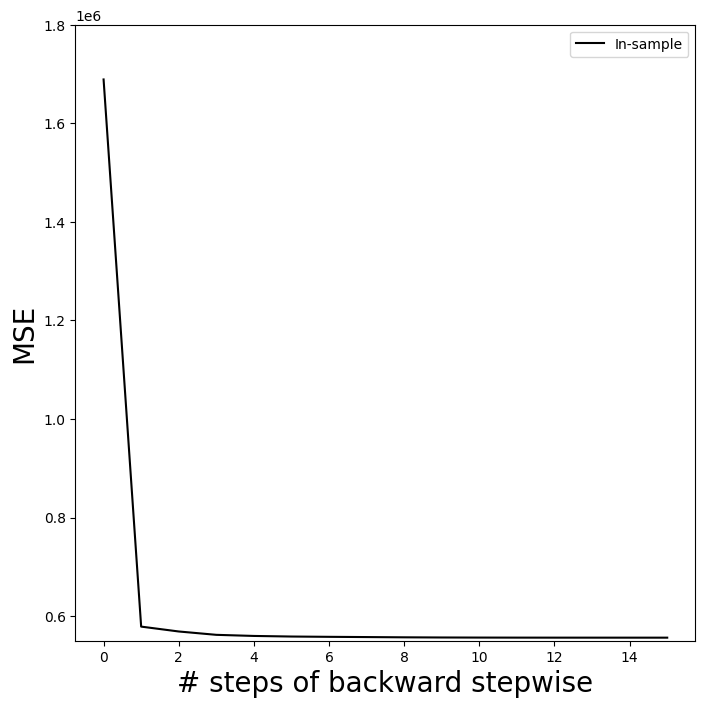

In [284]:
mse_fig, ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
        insample_mse,
        'k', # color black
        label='In-sample')
ax.set_ylabel('MSE',
              fontsize=20)
ax.set_xlabel('# steps of backward stepwise',
              fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax.set_ylim([550000,1800000]);


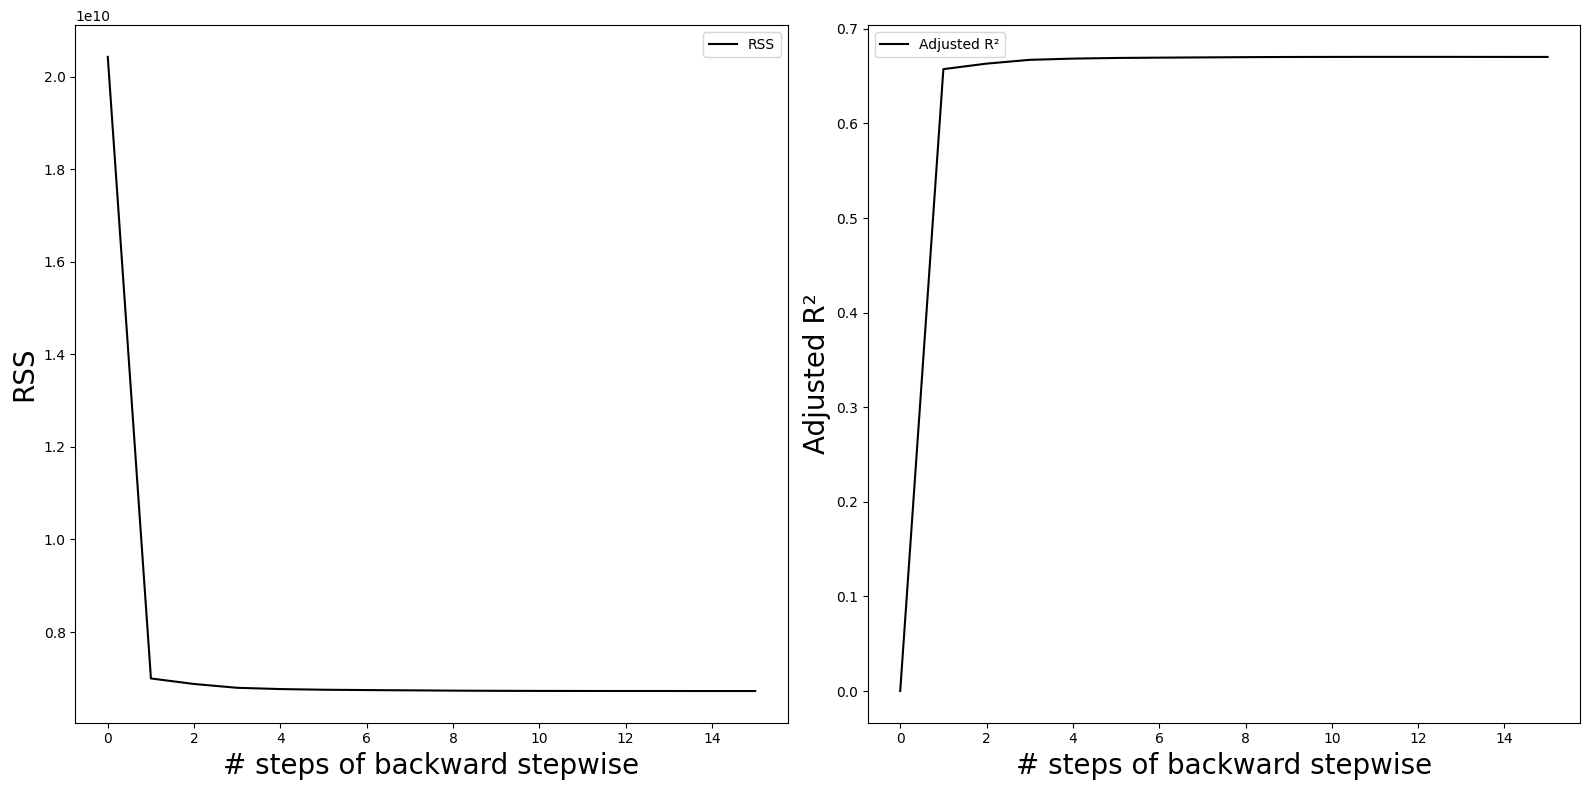

In [285]:
# Plot RSS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Calculate RSS
rss = ((Yhat_in - Y[:,None])**2).sum(0)
n_steps = rss.shape[0]

# RSS Plot
ax1.plot(np.arange(n_steps), rss, 'k', label='RSS')
ax1.set_ylabel('RSS', fontsize=20)
ax1.set_xlabel('# steps of backward stepwise', fontsize=20)
ax1.set_xticks(np.arange(n_steps)[::2])
ax1.legend()

# Calculate Adjusted R²
n = Y.shape[0]
p = np.arange(n_steps)
tss = np.sum((Y - np.mean(Y))**2)
r2 = 1 - rss/tss
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

# Adjusted R² Plot
ax2.plot(np.arange(n_steps), adj_r2, 'k', label='Adjusted R²')
ax2.set_ylabel('Adjusted R²', fontsize=20)
ax2.set_xlabel('# steps of backward stepwise', fontsize=20)
ax2.set_xticks(np.arange(n_steps)[::2])
ax2.legend()

plt.tight_layout()


The graph shows that adding features initially improves model performance quickly, but as more features are added, the improvement in MSE becomes minimal, indicating diminishing returns.

In [286]:
K = 5
kfold = skm.KFold(K,
                  random_state=6625,
                  shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path,
                                numeric_data,
                                Y,
                                cv=kfold)
Yhat_cv.shape


(12094, 16)

In [287]:
cv_mse = []
for train_idx, test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx] - Y[test_idx,None])**2
    cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
cv_mse.shape


(16, 5)

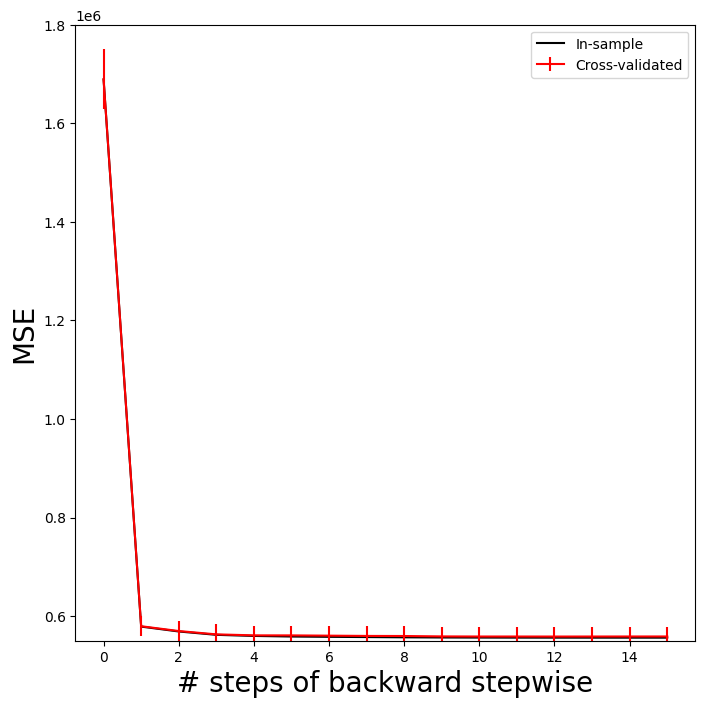

In [288]:
ax.errorbar(np.arange(n_steps),
            cv_mse.mean(1),
            cv_mse.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r') # color red
ax.set_ylim([550000,1800000])
ax.legend()
mse_fig


Try to zoom in

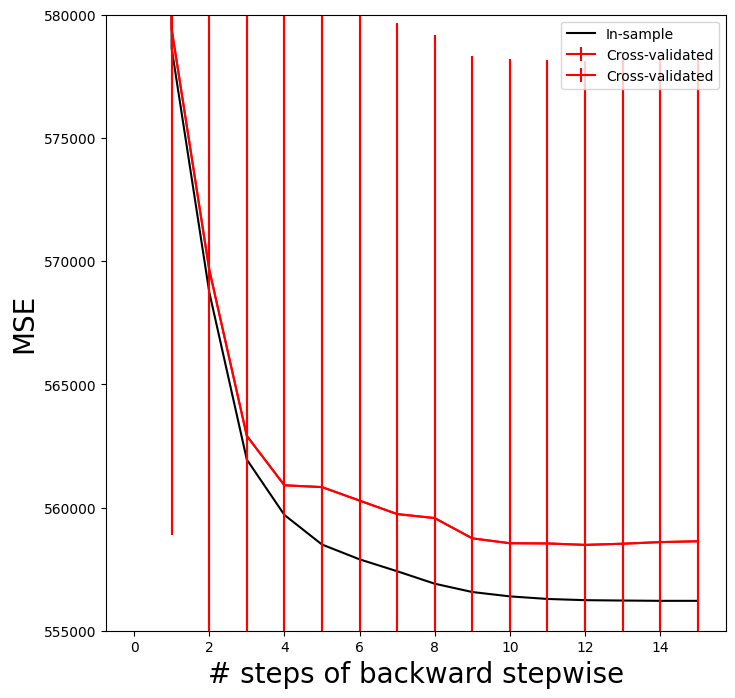

In [289]:
ax.errorbar(np.arange(n_steps),
            cv_mse.mean(1),
            cv_mse.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r') # color red
ax.set_ylim([555000,580000])
ax.legend()
mse_fig


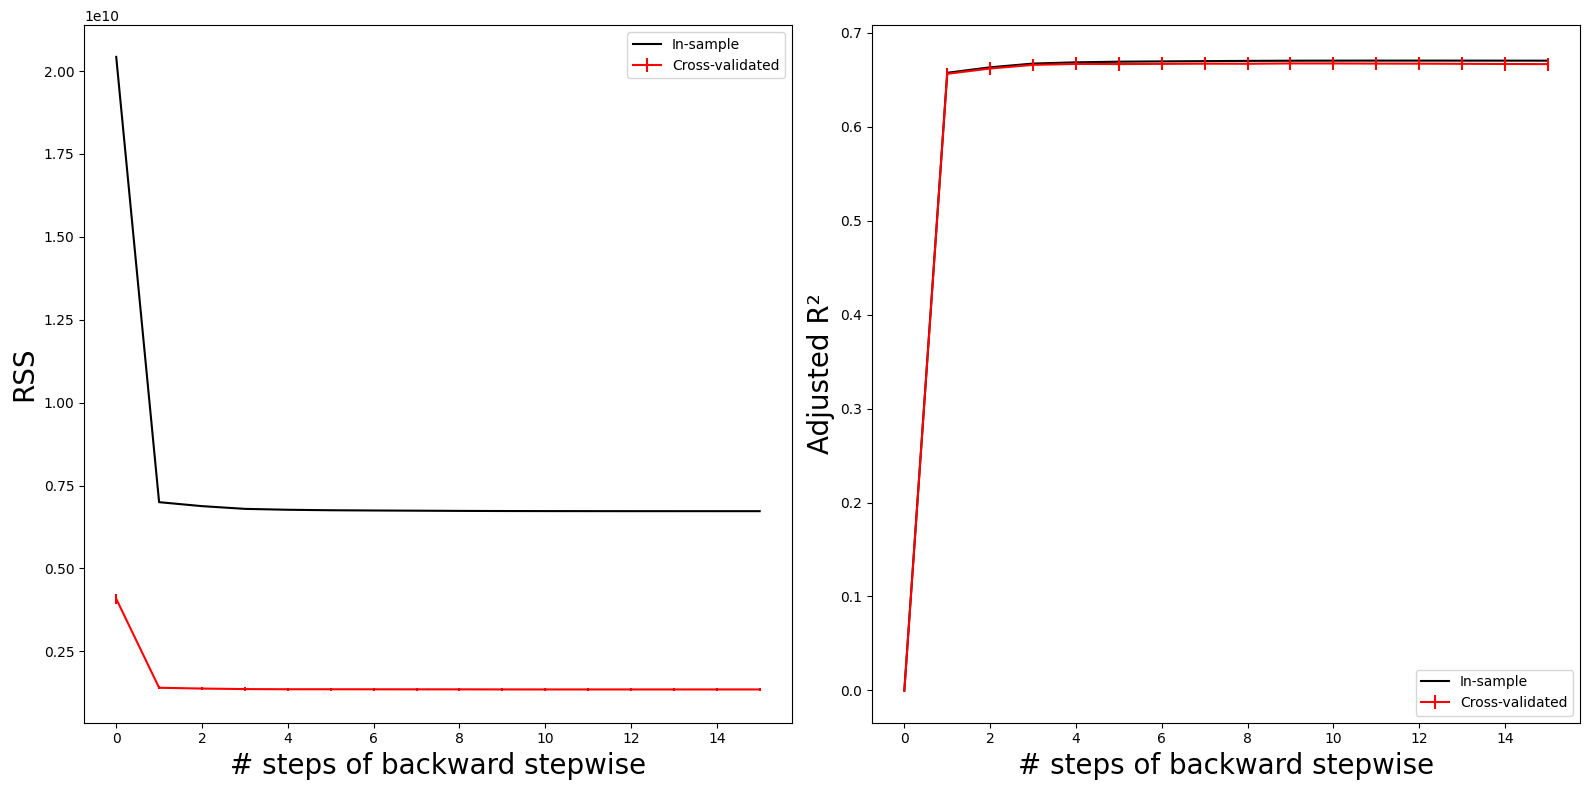

In [290]:
# Calculate cross-validated RSS and R² values
cv_rss = []
cv_adj_r2 = []

for train_idx, test_idx in kfold.split(Y):
    # RSS calculation for CV
    errors = (Yhat_cv[test_idx] - Y[test_idx,None])**2
    fold_rss = errors.sum(0)
    cv_rss.append(fold_rss)

    # Adjusted R² calculation for CV
    n_test = len(test_idx)
    p = np.arange(n_steps)
    tss_test = np.sum((Y[test_idx] - np.mean(Y[test_idx]))**2)
    r2_test = 1 - fold_rss/tss_test
    adj_r2_test = 1 - (1-r2_test)*(n_test-1)/(n_test-p-1)
    cv_adj_r2.append(adj_r2_test)

# Convert to numpy arrays
cv_rss = np.array(cv_rss).T
cv_adj_r2 = np.array(cv_adj_r2).T

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# RSS Plot
# In-sample RSS
rss = ((Yhat_in - Y[:,None])**2).sum(0)
ax1.plot(np.arange(n_steps), rss, 'k', label='In-sample')

# Cross-validated RSS
ax1.errorbar(np.arange(n_steps),
            cv_rss.mean(1),
            cv_rss.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r')
ax1.set_ylabel('RSS', fontsize=20)
ax1.set_xlabel('# steps of backward stepwise', fontsize=20)
ax1.set_xticks(np.arange(n_steps)[::2])
ax1.legend()

# Adjusted R² Plot
# In-sample Adjusted R²
n = Y.shape[0]
p = np.arange(n_steps)
tss = np.sum((Y - np.mean(Y))**2)
r2 = 1 - rss/tss
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
ax2.plot(np.arange(n_steps), adj_r2, 'k', label='In-sample')

# Cross-validated Adjusted R²
ax2.errorbar(np.arange(n_steps),
            cv_adj_r2.mean(1),
            cv_adj_r2.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r')
ax2.set_ylabel('Adjusted R²', fontsize=20)
ax2.set_xlabel('# steps of backward stepwise', fontsize=20)
ax2.set_xticks(np.arange(n_steps)[::2])
ax2.legend()

plt.tight_layout()

To repeat the above using the validation set approach, we simply change our
`cv` argument to a validation set: one random split of the data into a test and training. We choose a test size
of 30%, similar to the size of each test set in 5-fold cross-validation.`skm.ShuffleSplit()`

In [291]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.3,
                              random_state=6625)
for train_idx, test_idx in validation.split(Y):
    full_path.fit(numeric_data.iloc[train_idx],
                  Y[train_idx])
    Yhat_val = full_path.predict(numeric_data.iloc[test_idx])
    errors = (Yhat_val - Y[test_idx,None])**2
    validation_mse = errors.mean(0)


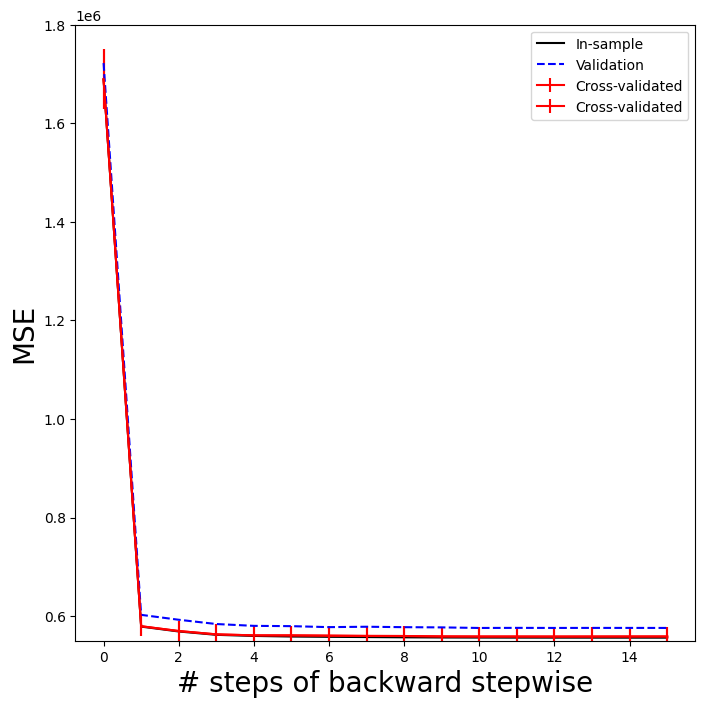

In [292]:
ax.plot(np.arange(n_steps),
        validation_mse,
        'b--', # color blue, broken line
        label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
ax.set_ylim([550000,1800000])
ax.legend()
mse_fig


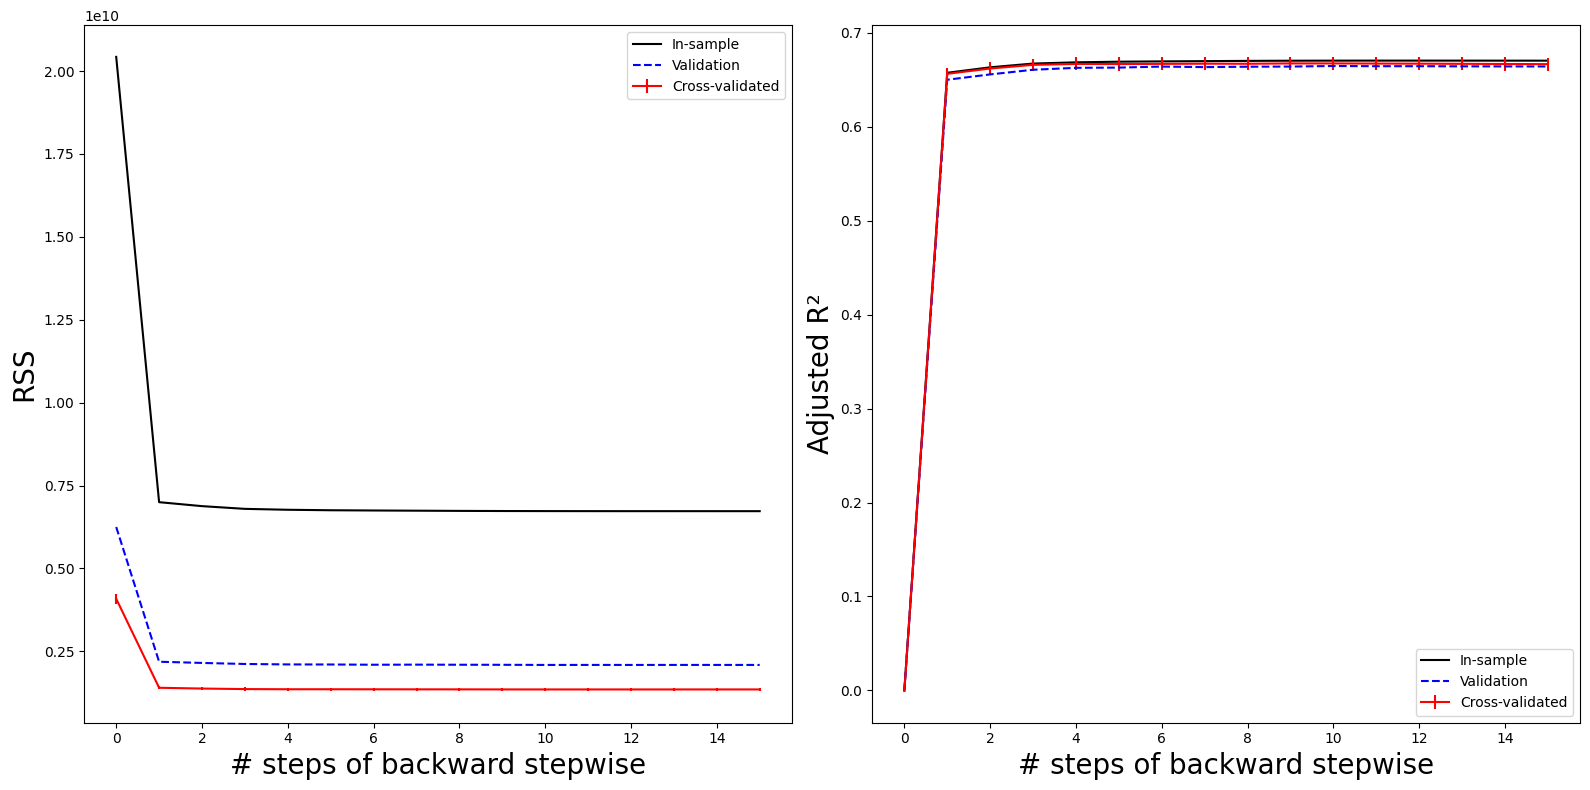

In [293]:
# Calculate validation metrics
for train_idx, test_idx in validation.split(Y):
    full_path.fit(numeric_data.iloc[train_idx],
                 Y[train_idx])

    Yhat_val = full_path.predict(numeric_data.iloc[test_idx])

    # Calculate validation RSS
    errors = (Yhat_val - Y[test_idx,None])**2
    validation_rss = errors.sum(0)

    # Calculate validation Adjusted R²
    n_val = len(test_idx)
    p = np.arange(n_steps)
    tss_val = np.sum((Y[test_idx] - np.mean(Y[test_idx]))**2)
    r2_val = 1 - validation_rss/tss_val
    validation_adj_r2 = 1 - (1-r2_val)*(n_val-1)/(n_val-p-1)

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# RSS Plot
# In-sample RSS
rss = ((Yhat_in - Y[:,None])**2).sum(0)
ax1.plot(np.arange(n_steps), rss, 'k', label='In-sample')

# Cross-validated RSS
ax1.errorbar(np.arange(n_steps),
            cv_rss.mean(1),
            cv_rss.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r')

# Validation RSS
ax1.plot(np.arange(n_steps),
         validation_rss,
         'b--',
         label='Validation')

ax1.set_ylabel('RSS', fontsize=20)
ax1.set_xlabel('# steps of backward stepwise', fontsize=20)
ax1.set_xticks(np.arange(n_steps)[::2])
ax1.legend()

# Adjusted R² Plot
# In-sample Adjusted R²
n = Y.shape[0]
p = np.arange(n_steps)
tss = np.sum((Y - np.mean(Y))**2)
r2 = 1 - rss/tss
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
ax2.plot(np.arange(n_steps), adj_r2, 'k', label='In-sample')

# Cross-validated Adjusted R²
ax2.errorbar(np.arange(n_steps),
            cv_adj_r2.mean(1),
            cv_adj_r2.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r')

# Validation Adjusted R²
ax2.plot(np.arange(n_steps),
         validation_adj_r2,
         'b--',
         label='Validation')

ax2.set_ylabel('Adjusted R²', fontsize=20)
ax2.set_xlabel('# steps of backward stepwise', fontsize=20)
ax2.set_xticks(np.arange(n_steps)[::2])
ax2.legend()

plt.tight_layout()

**Summary**:In both forward and backward selection processes, the same combination of 11 best features was selected from the 15 predictors. After examining the MSE, RSS, and Adjusted R2 on the training, cross-validation, and test sets, I observed a significant performance jump from 0 to 1 feature, but after that, adding more features resulted in little improvement. This suggests:

1. Dominance of a Single Feature: The performance boost is mainly driven by the
first feature, which likely captures most of the explainable information or primary patterns in the data.

2. Diminishing Marginal Gains from Additional Features: Adding more features has a minimal effect on performance, possibly because these features are highly correlated with the first one, or they contribute only marginally to the model's predictive power.

3. Model Complexity and Data Limitations: Even with additional features, the model's performance does not significantly improve, indicating that the model's capacity has likely reached the limit of explainable information in the data, and extra features cannot further enhance fitting or prediction.

4. Possible Redundancy or Irrelevant Features: While 11 features were selected, many of them may have limited contributions to the overall performance.

This further suggests that we should focus on:

* Analyzing and optimizing the core features;

* Considering more complex models (such as nonlinear models) to capture potential complex relationships;

* Reducing redundant features to simplify the model and improve generalization.

## PCR

In [294]:
pca = PCA(n_components=2)
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_


array([2.38155673, 1.58077961])

The results vary depending on whether the data has been standardized or not.

In [295]:
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline([('scaler', scaler),
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_


array([-422.34868402,  125.97091827])

In [296]:
param_grid = {'pca__n_components': range(1, 17)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=6625, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 17)},
             scoring='neg_mean_squared_error')

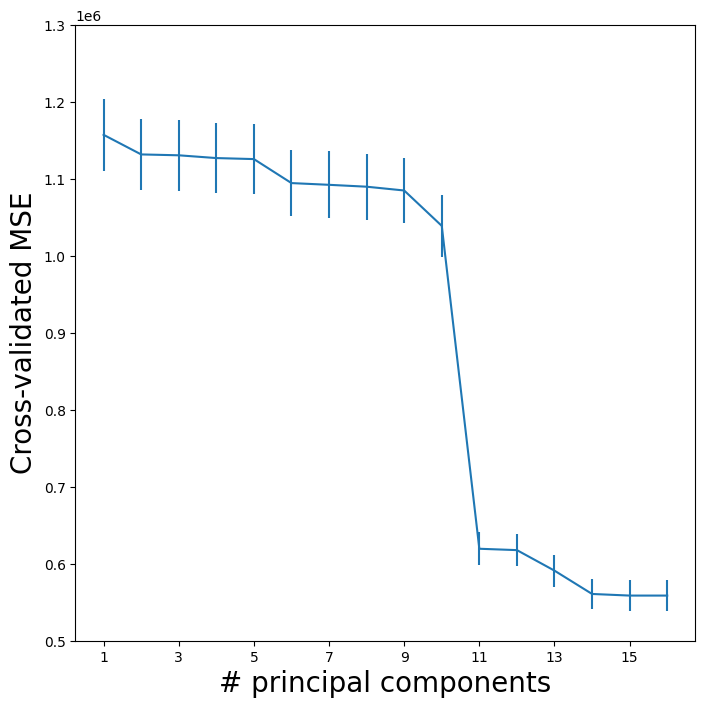

In [297]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([500000,1300000]);


In [298]:
Xn = np.zeros((X.shape[0], 1))
cv_null = skm.cross_validate(linreg,
                             Xn,
                             Y,
                             cv=kfold,
                             scoring='neg_mean_squared_error')
-cv_null['test_score'].mean()


1689272.275004683

The significant reduction in MSE from using 1-10 principal components (around 1300000) to 11-16 principal components (around 600000) compared to the baseline (1689272) indicates that more principal components effectively capture the underlying data patterns, improving model performance.

In [299]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.19900026, 0.10823919])

setting  𝑀=1  only captures 19.9% of the variance, while  𝑀=2  captures an additional 10.8%

The low variance explained by the first two principal components may indicate that the data structure is complex, potentially involving non-linear relationships that PCA struggles to capture.

**Summary**:First, the data was standardized to ensure all features were on the same scale. Then, Principal Component Analysis (PCA) was applied to reduce dimensionality. The explained variance ratio of the first two principal components was [0.19900026, 0.10823919], meaning that the first principal component (PC1) accounts for approximately 19.9% of the total variance, and the second principal component (PC2) accounts for 10.8%, with a combined total of about 30.7%.

This indicates that the variance in the data is distributed across many dimensions, suggesting high data complexity. The first two principal components fail to capture most of the information in the data, and additional principal components are needed to effectively represent the data structure. Excessive dimensionality reduction could lead to a significant loss of critical information, as reflected in the sharp increase in test set error when the number of components is reduced too far.

Notably, when fewer than 11 principal components were retained, the model experienced a sharp performance drop, likely due to excessive information loss and the inability to capture the data's complex relationships, causing the test error to remain persistently high.

#Part 3: Classification

I will continue using my dataset "online_shoppers_intention" and this time I choose Revenue as the dependent variable because it is a binary classification.

In [300]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [301]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor        0        0  
1        2       1            2  Returning_Visitor        0        0  
2        1       9            3  Returning_Visitor        0        0  
3        2       2            4  Returning_Visitor        0        0  
4        3       1            4  Returning_Visitor        1        0

In [302]:
X1 = data.copy()

In [303]:
X1.corr(numeric_only=True)


Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561                -0.014376   
Weekend                        0.026417                 0.014990   
Revenue                        0.138917                 0.093587   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                 1.000000                0.618955   
Informational_Duration        0.618955                1.000000   
ProductRelated                0.374164                0.280046   
ProductRelated_Duration       0.387505                0.347364   
BounceRates                  -0.116114               -0.074067   
ExitRates                    -0.163666               -0.105276   
PageValues                    0.048632                0.030861   
SpecialDay                   -0.048219               -0.030577   
OperatingSystems             -0.009527               -0.009579   
Browser                      -0.038235               -0.019285   
Region                       -0.029169               -0.027144   
TrafficType                  -0.034491               -0.024675   
Weekend                       0.035785                0.024078   
Revenue                       0.095200                0.070345   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.431119                 0.373939    -0.223563   
Administrative_Duration        0.289087                 0.355422    -0.144170   
Informational                  0.374164                 0.387505    -0.116114   
Informational_Duration         0.280046                 0.347364    -0.074067   
ProductRelated                 1.000000                 0.860927    -0.204578   
ProductRelated_Duration        0.860927                 1.000000    -0.184541   
BounceRates                   -0.204578                -0.184541     1.000000   
ExitRates                     -0.292526                -0.251984     0.913004   
PageValues                     0.056282                 0.052823    -0.119386   
SpecialDay                    -0.023958                -0.036380     0.072702   
OperatingSystems               0.004290                 0.002976     0.023823   
Browser                       -0.013146                -0.007380    -0.015772   
Region                        -0.038122                -0.033091    -0.006485   
TrafficType                   -0.043064                -0.036377     0.078286   
Weekend                        0.016092                 0.007311    -0.046514   
Revenue                        0.158538                 0.152373    -0.150673   

                         ExitRates  PageValues  SpecialDay  OperatingSystems  \
Administrative           -0.316483    0.098990   -0.094778         -0.006347   
Administrative_Duration  -0.205798    0.067608   -0.073304         -0.007343   
Informational            -0.163666    0.048632   -0.048219         -0.009527   
Informational_Duration   -0.105276    0.030861 

In [304]:
X1['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

`Month` column has too many categories, and I'm concerned about the sparsity issue caused by the increase in dimensionality, so I've chosen to drop it directly.

In [305]:
X1 = X1.drop(columns=['Month'])

In [306]:
X1['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

Try to perform one-hot encoding on the `VisitorType` column.

In [307]:
X_encoded = pd.get_dummies(X1['VisitorType'], drop_first=True)


X1 = pd.concat([X1, X_encoded], axis=1)


X1.drop('VisitorType', axis=1, inplace=True)


X1.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0         0.20       0.20         0.0         0.0                 1        1   
1         0.00       0.10         0.0         0.0                 2        2   
2         0.20       0.20         0.0         0.0                 4        1   
3         0.05       0.14         0.0         0.0                 3        2   
4         0.02       0.05         0.0         0.0                 3        3   

   Region  TrafficType  Weekend  Revenue  Other  Returning_Visitor  
0       1            1        0        0  False               True  
1       1            2        0        0  False               True  
2       9            3        0        0  False               True  
3       2            4        0        0  False               True  
4       1            4        1        0  False               True

In [308]:
X1['Returning_Visitor'] = X1['Returning_Visitor'].astype(int)
X1['Other'] = X1['Other'].astype(int)

In [309]:
vals = [VIF(X1, i)
        for i in range(1, X1.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X1.columns[1:])
vif


vif
Administrative_Duration   2.043435
Informational             2.120618
Informational_Duration    1.778910
ProductRelated            6.664833
ProductRelated_Duration   6.020710
BounceRates               7.306985
ExitRates                11.629114
PageValues                1.475919
SpecialDay                1.128364
OperatingSystems          5.826683
Browser                   3.118469
Region                    2.559501
TrafficType               2.128136
Weekend                   1.281930
Revenue                   1.606816
Other                     1.274110
Returning_Visitor         6.020282

## Logistic Regression

In [310]:
allvars = X1.columns.drop(['ExitRates','Revenue'])
design = MS(allvars)
X = design.fit_transform(X1)
y = X1.Revenue == 1
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)


coef   std err       z  P>|z|
intercept                -2.022200  0.125000 -16.197  0.000
Administrative            0.014000  0.011000   1.292  0.196
Administrative_Duration  -0.000100  0.000000  -0.646  0.518
Informational             0.030000  0.027000   1.123  0.262
Informational_Duration    0.000033  0.000000   0.149  0.882
ProductRelated            0.004900  0.001000   4.321  0.000
ProductRelated_Duration   0.000047  0.000028   1.682  0.092
BounceRates             -16.993400  2.226000  -7.635  0.000
PageValues                0.082800  0.002000  35.377  0.000
SpecialDay               -0.940800  0.215000  -4.373  0.000
OperatingSystems         -0.080600  0.039000  -2.076  0.038
Browser                   0.028300  0.019000   1.517  0.129
Region                   -0.015900  0.013000  -1.225  0.220
TrafficType               0.011400  0.008000   1.393  0.163
Weekend                   0.160400  0.070000   2.293  0.022
Other                    -0.758800  0.540000  -1.405  0.160
Returning_Visitor        -0.450900  0.083000  -5.410  0.000

In [311]:
results.params

intercept                  -2.022179
Administrative              0.014030
Administrative_Duration    -0.000127
Informational               0.030035
Informational_Duration      0.000033
ProductRelated              0.004930
ProductRelated_Duration     0.000047
BounceRates               -16.993369
PageValues                  0.082824
SpecialDay                 -0.940811
OperatingSystems           -0.080577
Browser                     0.028280
Region                     -0.015882
TrafficType                 0.011365
Weekend                     0.160383
Other                      -0.758833
Returning_Visitor          -0.450871
dtype: float64

Access the p-values for the coefficients.

In [312]:
results.pvalues


intercept                   5.268690e-59
Administrative              1.962263e-01
Administrative_Duration     5.182304e-01
Informational               2.615883e-01
Informational_Duration      8.818345e-01
ProductRelated              1.550416e-05
ProductRelated_Duration     9.247895e-02
BounceRates                 2.250599e-14
PageValues                 3.866098e-274
SpecialDay                  1.222783e-05
OperatingSystems            3.789984e-02
Browser                     1.293121e-01
Region                      2.204899e-01
TrafficType                 1.634921e-01
Weekend                     2.183749e-02
Other                       1.601423e-01
Returning_Visitor           6.318090e-08
dtype: float64

In [313]:
probs = results.predict()
probs[:10]

array([0.00266839, 0.07189539, 0.00188929, 0.02976497, 0.06290767,
       0.06140792, 0.00182436, 0.00340064, 0.03501403, 0.0551404 ])

In [314]:
labels = np.array([0]*12330)
labels[probs>0.5] = 1

In [315]:
confusion_table(labels, X1.Revenue)

Truth          0     1
Predicted             
0          10182  1205
1            240   703

Calculate the accuracy

In [316]:
(10182+703)/12330, np.mean(labels == X1.Revenue)

(0.8828061638280617, 0.8828061638280617)

Now we try train test split

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6625)
X_test.shape

(3699, 17)

In [318]:
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)


In [319]:
R = X1.Revenue
L_train, L_test = train_test_split(R, test_size=0.3, random_state=6625)

In [320]:
labels = np.array([0]*3699)
labels[probs>0.5] = 1
confusion_table(labels, L_test)

Truth         0    1
Predicted           
0          3057  364
1            64  214

In [321]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.8842930521762639, 0.11570694782373614)

Now the model seems to perform well and does not overfit; in fact, it performs slightly better on the test set. Let’s try to improve it further.

In [322]:
model = MS(['ProductRelated', 'BounceRates','PageValues','SpecialDay','Returning_Visitor']).fit(X1)
X = model.transform(X1)
X_train, X_test = train_test_split(X, test_size=0.3, random_state=6625)
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array([0]*3699)
labels[probs>0.5] = 1
confusion_table(labels, L_test)


Truth         0    1
Predicted           
0          3052  367
1            69  211

In [323]:
(3052+211)/3699

0.8821303054879697


It seems that this has not improved much, and the current model is good enough (at least for simple logistic regression)

**Summary**:Logistic regression was performed using all features except 'ExitRates' and 'Revenue' as predictors, with 'Revenue' (a binary variable) as the target. The model showed strong performance and no signs of overfitting.

I believe this is because:
1. Relevant Features: The selected features effectively capture the key factors influencing the binary target variable, providing sufficient information for accurate predictions.
2. Model Simplicity: Logistic regression is inherently simple and robust, reducing the likelihood of overfitting.

## Linear Discriminant Analysis

In [324]:
lda = LDA(store_covariance=True)

Remove the column corresponding to the intercept.( LDA estimator automatically adds an intercept)

In [325]:
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)


LinearDiscriminantAnalysis(store_covariance=True)

Extract the means in the two classes with the `means_` attribute.

In [326]:
lda.means_


array([[2.88983701e+01, 2.56614599e-02, 2.03620654e+00, 6.96890837e-02,
        8.74263799e-01],
       [4.92541353e+01, 5.29076848e-03, 2.69444392e+01, 2.13533835e-02,
        7.89473684e-01]])

In [327]:
lda.classes_

array([0, 1])

The LDA output indicates that $\hat\pi_{False}=0.846$ and
$\hat\pi_{True}=0.154$.


In [328]:
lda.priors_

array([0.8459043, 0.1540957])

Shown the linear discriminant vectors

In [329]:
lda.scalings_

array([[ 0.00658805],
       [-2.87682532],
       [ 0.05551703],
       [-0.53331869],
       [-0.30459058]])

In [330]:
lda_pred = lda.predict(X_test)

In [331]:
confusion_table(lda_pred, L_test)

Truth         0    1
Predicted           
0          3065  390
1            56  188

In [332]:
(3065+188)/3699

0.8794268721276021

Applying a 50% threshold to the posterior probabilities of being in class 1

In [333]:
lda_prob = lda.predict_proba(X_test)
np.all(
       np.where(lda_prob[:,1] >= 0.5, 1,0) == lda_pred
       )


True

Above shown in the binary classification problem of the LDA model, its predict() method makes decisions based on the probability threshold of 0.5.

In [334]:
np.sum(lda_prob[:,0] > 0.9)

2990

In [335]:
np.sum(lda_prob[:,0] > 0.5)

3455

Above shown:

Overall, this model behaves quite "decisively" in its predictions, with little hesitation. Very confident (>0.9) about most predictions (about 86.5%)

**Summary**:LDA was applied to the same task as logistic regression and demonstrated similar performance on test set. Moreover, the model showed a high number of predictions where the probability for one class exceeded 0.9. This indicates that the model behaves very "decisively" in its predictions, with minimal hesitation. It is highly confident (>0.9) in about 86.5% of its predictions, reflecting strong discriminative ability and robust classification for this dataset.

#Section B

#Part 1: Splines

In [336]:
from pygam import (s as s_gam,
                   l as l_gam,
                   f as f_gam,
                   LinearGAM,
                   LogisticGAM)

from ISLP.transforms import (BSpline,
                             NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam,
                        degrees_of_freedom,
                        plot as plot_gam,
                        anova as anova_gam)

Using `BounceRates` as the dependent variable and `ProductRelated` as the independent variable can explore how the number of product-related pages visited influences the likelihood of users bouncing from the website.

In [337]:
numeric_data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0         0.20       0.20         0.0         0.0                 1        1   
1         0.00       0.10         0.0         0.0                 2        2   
2         0.20       0.20         0.0         0.0                 4        1   
3         0.05       0.14         0.0         0.0                 3        2   
4         0.02       0.05         0.0         0.0                 3        3   

   Region  TrafficType  Weekend  Revenue  
0       1            1        0        0  
1       1            2        0        0  
2       9            3        0        0  
3       2            4        0        0  
4       1            4        1        0

In [338]:
y = numeric_data['BounceRates']
ProductRelated = numeric_data['ProductRelated']

In [339]:
poly_Prod = MS([poly('ProductRelated', degree=4)]).fit(numeric_data)
M = sm.OLS(y, poly_Prod.transform(numeric_data)).fit()
summarize(M)


coef  std err       t  P>|t|
intercept                          0.0225    0.000  58.603    0.0
poly(ProductRelated, degree=4)[0] -1.3878    0.042 -32.830    0.0
poly(ProductRelated, degree=4)[1]  1.3875    0.042  32.822    0.0
poly(ProductRelated, degree=4)[2] -1.3524    0.042 -31.993    0.0
poly(ProductRelated, degree=4)[3]  1.2749    0.042  30.158    0.0

Now create a grid of values for `ProductRelated` at which we want
predictions.

In [340]:
Prod_grid = np.linspace(ProductRelated.min(),
                       ProductRelated.max(),
                       100)
Prod_df = pd.DataFrame({'ProductRelated': Prod_grid})


In [341]:
def plot_data_fit(Prod_df,
                  basis,
                  title):

    X = basis.transform(numeric_data)
    Xnew = basis.transform(Prod_df)
    M = sm.OLS(y, X).fit()
    preds = M.get_prediction(Xnew)
    bands = preds.conf_int(alpha=0.05)
    fig, ax = subplots(figsize=(8,8))
    ax.scatter(ProductRelated,
               y,
               facecolor='gray',
               alpha=0.5)
    for val, ls in zip([preds.predicted_mean,
                      bands[:,0],
                      bands[:,1]],
                     ['b','r--','r--']):
        ax.plot(Prod_df.values, val, ls, linewidth=3)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('ProductRelated', fontsize=20)
    ax.set_ylabel('BounceRates', fontsize=20);
    return ax


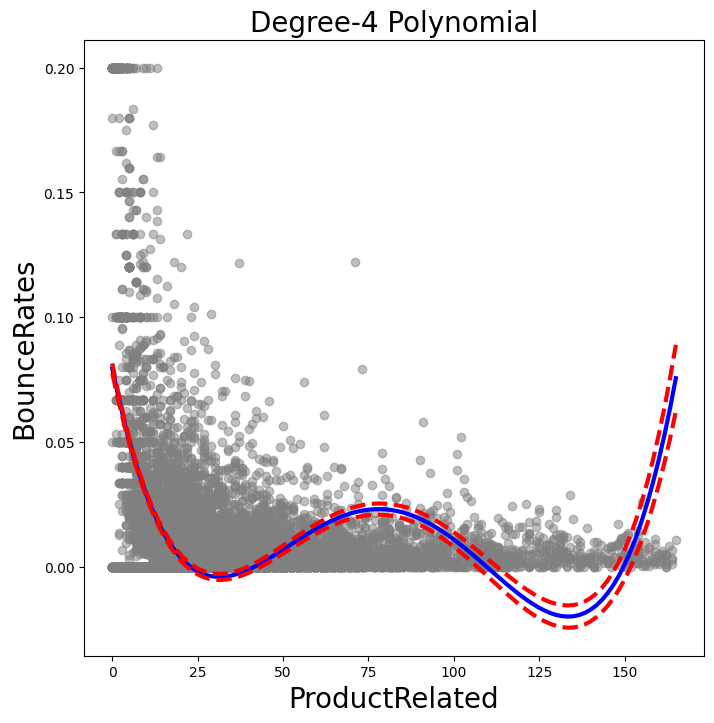

In [342]:
plot_data_fit(Prod_df,
              poly_Prod,
              'Degree-4 Polynomial');

There exists a lot of bias ,let's try increase the degree

In [343]:
poly_Prod = MS([poly('ProductRelated', degree=6)]).fit(numeric_data)
M = sm.OLS(y, poly_Prod.transform(numeric_data)).fit()
summarize(M)


coef  std err       t  P>|t|
intercept                          0.0225     0.00  62.647    0.0
poly(ProductRelated, degree=6)[0] -1.3878     0.04 -35.096    0.0
poly(ProductRelated, degree=6)[1]  1.3875     0.04  35.087    0.0
poly(ProductRelated, degree=6)[2] -1.3524     0.04 -34.201    0.0
poly(ProductRelated, degree=6)[3]  1.2749     0.04  32.239    0.0
poly(ProductRelated, degree=6)[4] -1.2029     0.04 -30.420    0.0
poly(ProductRelated, degree=6)[5]  1.1204     0.04  28.333    0.0

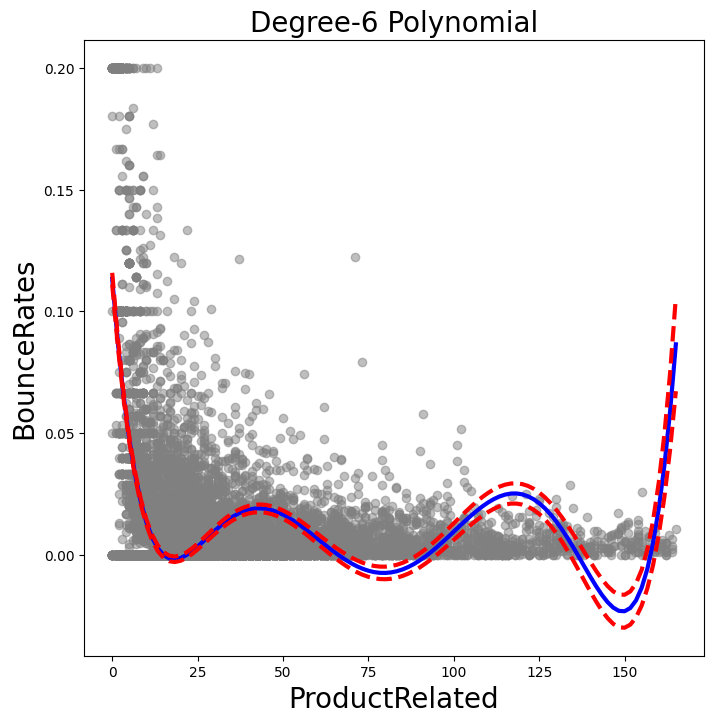

In [344]:
plot_data_fit(Prod_df,
              poly_Prod,
              'Degree-6 Polynomial');

Try train test split

In [345]:
X_train, X_test, y_train, y_test = train_test_split(numeric_data, y,
                                                    test_size=0.3,
                                                    random_state=6625)


poly_Prod_train = MS([poly('ProductRelated', degree=6)]).fit(X_train)
X_train_poly = poly_Prod_train.transform(X_train)
X_test_poly = poly_Prod_train.transform(X_test)


model = sm.OLS(y_train, X_train_poly).fit()

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


from sklearn.metrics import mean_squared_error, r2_score


train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)


test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("Training set evaluation results:")
print(f"MSE: {train_mse:.4f}")
print(f"R²: {train_r2:.4f}")
print("\nTesting set evaluation results:")
print(f"MSE: {test_mse:.4f}")
print(f"R²: {test_r2:.4f}")


Training set evaluation results:
MSE: 0.0016
R²: 0.3371

Testing set evaluation results:
MSE: 0.0016
R²: 0.3659


In [346]:
models = [MS([poly('ProductRelated', degree=d)])
          for d in range(1, 10)]
Xs = [model.fit_transform(numeric_data) for model in models]
anova_lm(*[sm.OLS(y, X_).fit()
           for X_ in Xs])

df_resid        ssr  df_diff   ss_diff            F         Pr(>F)
0   12092.0  26.982178      0.0       NaN          NaN            NaN
1   12091.0  25.057067      1.0  1.925111  1422.503391  2.074622e-294
2   12090.0  23.227956      1.0  1.829111  1351.567174  1.401218e-280
3   12089.0  21.602694      1.0  1.625262  1200.939117  5.705476e-251
4   12088.0  20.155702      1.0  1.446992  1069.211262  8.499721e-225
5   12087.0  18.900401      1.0  1.255302   927.567719  2.342374e-196
6   12086.0  17.857544      1.0  1.042856   770.587695  1.812867e-164
7   12085.0  17.021720      1.0  0.835824   617.607317  5.241140e-133
8   12084.0  16.353593      1.0  0.668126   493.692127  3.098650e-107

In [347]:
M = sm.OLS(y, poly_Prod.transform(numeric_data)).fit()
summarize(M)

coef  std err       t  P>|t|
intercept                          0.0225     0.00  62.647    0.0
poly(ProductRelated, degree=6)[0] -1.3878     0.04 -35.096    0.0
poly(ProductRelated, degree=6)[1]  1.3875     0.04  35.087    0.0
poly(ProductRelated, degree=6)[2] -1.3524     0.04 -34.201    0.0
poly(ProductRelated, degree=6)[3]  1.2749     0.04  32.239    0.0
poly(ProductRelated, degree=6)[4] -1.2029     0.04 -30.420    0.0
poly(ProductRelated, degree=6)[5]  1.1204     0.04  28.333    0.0

ANOVA method works whether or not we used orthogonal polynomials, provided the models are nested.

In [348]:
models = [MS(['ProductRelated_Duration', poly('ProductRelated', degree=d)])
          for d in range(1, 6)]
XEs = [model.fit_transform(numeric_data)
       for model in models]
anova_lm(*[sm.OLS(y, X_).fit() for X_ in XEs])


df_resid        ssr  df_diff   ss_diff            F         Pr(>F)
0   12091.0  26.941575      0.0       NaN          NaN            NaN
1   12090.0  25.043868      1.0  1.897707  1138.431856  1.386320e-238
2   12089.0  23.216006      1.0  1.827862  1096.532195  3.010851e-230
3   12088.0  21.597443      1.0  1.618563   970.974034  4.174590e-205
4   12087.0  20.148402      1.0  1.449040   869.277478  1.460796e-184

consider the task of predicting whether ProductRelated_Duration > 4000

In [349]:
X = poly_Prod.transform(numeric_data)
High_BounceRate = numeric_data['High_BounceRate'] = y > 0.05
glm = sm.GLM(y > 0.05,
             X,
             family=sm.families.Binomial())
B = glm.fit()
summarize(B)

coef  std err       z  P>|z|
intercept                           -4.2046    0.343 -12.251  0.000
poly(ProductRelated, degree=6)[0] -561.1802  134.379  -4.176  0.000
poly(ProductRelated, degree=6)[1] -326.7741  133.088  -2.455  0.014
poly(ProductRelated, degree=6)[2] -213.6313   52.103  -4.100  0.000
poly(ProductRelated, degree=6)[3]  123.3006   55.382   2.226  0.026
poly(ProductRelated, degree=6)[4]  192.4227   67.639   2.845  0.004
poly(ProductRelated, degree=6)[5]  195.2771   31.609   6.178  0.000

In [350]:
newX = poly_Prod.transform(Prod_df)
preds = B.get_prediction(newX)
bands = preds.conf_int(alpha=0.05)


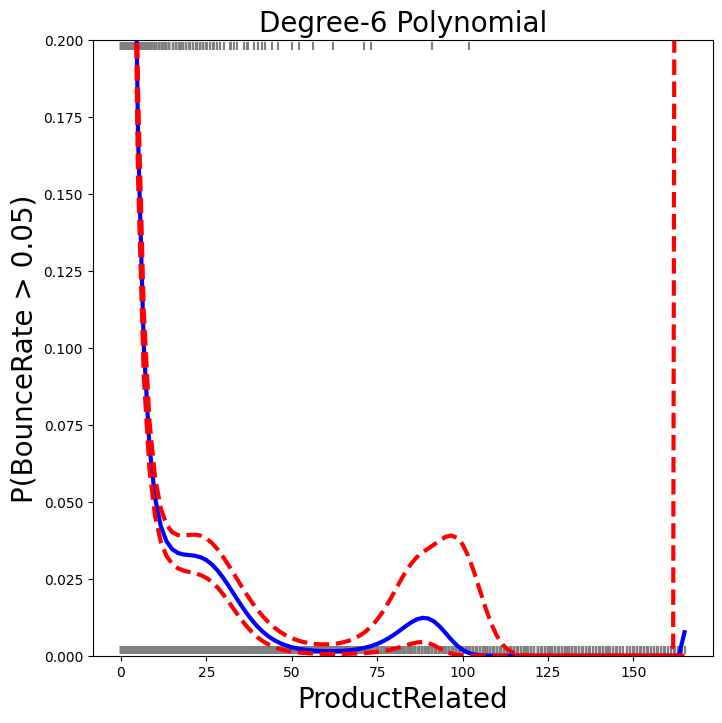

In [351]:
fig, ax = subplots(figsize=(8,8))
rng = np.random.default_rng(0)
ax.scatter(ProductRelated +
           0.2 * rng.uniform(size=y.shape[0]),
           np.where(High_BounceRate, 0.198, 0.002),
           fc='gray',
           marker='|')
for val, ls in zip([preds.predicted_mean,
                  bands[:,0],
                  bands[:,1]],
                 ['b','r--','r--']):
    ax.plot(Prod_df.values, val, ls, linewidth=3)
ax.set_title('Degree-6 Polynomial', fontsize=20)
ax.set_xlabel('ProductRelated', fontsize=20)
ax.set_ylim([0,0.2])
ax.set_ylabel('P(BounceRate > 0.05)', fontsize=20);


In [352]:
cut_Prod = pd.qcut(ProductRelated, 4)
summarize(sm.OLS(y, pd.get_dummies(cut_Prod)).fit())

coef  std err       t  P>|t|
(-0.001, 7.0]  0.0587    0.001  75.156    0.0
(7.0, 17.0]    0.0128    0.001  15.801    0.0
(17.0, 36.0]   0.0095    0.001  11.838    0.0
(36.0, 165.0]  0.0071    0.001   8.805    0.0

In [353]:
X_train, X_test, y_train, y_test = train_test_split(ProductRelated, y,
                                                    test_size=0.3,
                                                    random_state=6625)

cut_Prod_train = pd.qcut(X_train, 4)
cut_Prod_test = pd.qcut(X_test, 4, labels=cut_Prod_train.cat.categories)

X_train_dummy = pd.get_dummies(cut_Prod_train)
X_test_dummy = pd.get_dummies(cut_Prod_test)

model = sm.OLS(y_train, X_train_dummy).fit()

y_train_pred = model.predict(X_train_dummy)
y_test_pred = model.predict(X_test_dummy)


from sklearn.metrics import mean_squared_error, r2_score


train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)


test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Training Set Evaluation Results:")
print(f"MSE: {train_mse:.4f}")
print(f"R²: {train_r2:.4f}")
print("\nTest Set Evaluation Results:")
print(f"MSE: {test_mse:.4f}")
print(f"R²: {test_r2:.4f}")


Training Set Evaluation Results:
MSE: 0.0019
R²: 0.1903

Test Set Evaluation Results:
MSE: 0.0020
R²: 0.2049


**Summary**:Polynomial regression was conducted with `ProductRelated` (the number of pages of this type that the user visited) as the predictor and `BounceRates` (the percentage of visitors who exit without triggering additional tasks) as the target. The goal was to explore the relationship between these two variables. However, based on performance on the test set,the relationship appears to be quite complex, as polynomial regression struggled to adequately capture it, even when higher-degree polynomials were used.

This could be due to the following reasons:

1. Nonlinear and Non-polynomial Relationship: The relationship between `ProductRelated` and `BounceRates` may not follow a simple polynomial form, suggesting the presence of more intricate patterns or interactions.
2. Noise in the Data: The target variable, `BounceRates`, may contain a significant amount of noise or variability that cannot be explained by `ProductRelated` alone, regardless of the polynomial degree.

## Splines

In [354]:
bs_ = BSpline(internal_knots=[25,75,125], intercept=True).fit(ProductRelated)
bs_Prod = bs_.transform(ProductRelated)
bs_Prod.shape


(12094, 7)

We now fit a cubic spline model to the `BounceRates`  data.

In [355]:
bs_Prod = MS([bs('ProductRelated', internal_knots=[25,75,125])])
Xbs = bs_Prod.fit_transform(numeric_data)
M = sm.OLS(y, Xbs).fit()
summarize(M)


coef  std err       t  \
intercept                                           0.1174    0.001  94.401   
bs(ProductRelated, internal_knots=[25, 75, 125]... -0.1498    0.002 -64.271   
bs(ProductRelated, internal_knots=[25, 75, 125]... -0.0678    0.002 -32.388   
bs(ProductRelated, internal_knots=[25, 75, 125]... -0.1509    0.004 -38.957   
bs(ProductRelated, internal_knots=[25, 75, 125]... -0.0716    0.005 -13.375   
bs(ProductRelated, internal_knots=[25, 75, 125]... -0.1428    0.008 -18.458   
bs(ProductRelated, internal_knots=[25, 75, 125]... -0.0957    0.010 -10.011   

                                                    P>|t|  
intercept                                             0.0  
bs(ProductRelated, internal_knots=[25, 75, 125]...    0.0  
bs(ProductRelated, internal_knots=[25, 75, 125]...    0.0  
bs(ProductRelated, internal_knots=[25, 75, 125]...    0.0  
bs(ProductRelated, internal_knots=[25, 75, 125]...    0.0  
bs(ProductRelated, internal_knots=[25, 75, 125]...    0.0  
bs(ProductRelated, internal_knots=[25, 75, 125]...    0.0

Rename the column names

In [356]:
bs_Prod = MS([bs('ProductRelated',
                internal_knots=[25,75,125],
                name='bs(ProductRelated)')])
Xbs = bs_Prod.fit_transform(numeric_data)
M = sm.OLS(y, Xbs).fit()
summarize(M)


coef  std err       t  P>|t|
intercept              0.1174    0.001  94.401    0.0
bs(ProductRelated)[0] -0.1498    0.002 -64.271    0.0
bs(ProductRelated)[1] -0.0678    0.002 -32.388    0.0
bs(ProductRelated)[2] -0.1509    0.004 -38.957    0.0
bs(ProductRelated)[3] -0.0716    0.005 -13.375    0.0
bs(ProductRelated)[4] -0.1428    0.008 -18.458    0.0
bs(ProductRelated)[5] -0.0957    0.010 -10.011    0.0

We could also use the `df` (degrees of freedom) option to
specify the complexity of the spline.  We see above that with 3 knots,
the spline basis has 6 columns or degrees of freedom.  

In [357]:
BSpline(df=6).fit(ProductRelated).internal_knots_

array([ 7., 17., 36.])


Try different degrees of freedom (9, 16, 22), and experiment with the training and test split to compare the model performance.

In [358]:
X_train, X_test, y_train, y_test = train_test_split(numeric_data, y,
                                                    test_size=0.3,
                                                    random_state=6625)

In [359]:
bs_Prod_9 = MS([bs('ProductRelated', df=9)]).fit(X_train)
X_train_bs9 = bs_Prod_9.transform(X_train)
X_test_bs9 = bs_Prod_9.transform(X_test)
model_bs9 = sm.OLS(y_train, X_train_bs9).fit()

# Calculate predictions and evaluation metrics
y_train_pred_bs9 = model_bs9.predict(X_train_bs9)
y_test_pred_bs9 = model_bs9.predict(X_test_bs9)

print("B-spline with df=9:")
print("Training set:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred_bs9):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred_bs9):.4f}")
print("Test set:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred_bs9):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred_bs9):.4f}\n")

B-spline with df=9:
Training set:
MSE: 0.0012
R²: 0.4814
Test set:
MSE: 0.0012
R²: 0.5210



In [360]:
bs_Prod_16 = MS([bs('ProductRelated', df=16)]).fit(X_train)
X_train_bs16 = bs_Prod_16.transform(X_train)
X_test_bs16 = bs_Prod_16.transform(X_test)
model_bs16 = sm.OLS(y_train, X_train_bs16).fit()

# Calculate predictions and evaluation metrics
y_train_pred_bs16 = model_bs16.predict(X_train_bs16)
y_test_pred_bs16 = model_bs16.predict(X_test_bs16)

print("B-spline with df=16:")
print("Training set:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred_bs16):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred_bs16):.4f}")
print("Test set:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred_bs16):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred_bs16):.4f}\n")


B-spline with df=16:
Training set:
MSE: 0.0011
R²: 0.5451
Test set:
MSE: 0.0011
R²: 0.5693



In [361]:
bs_Prod_22 = MS([bs('ProductRelated', df=22)]).fit(X_train)
X_train_bs22 = bs_Prod_22.transform(X_train)
X_test_bs22 = bs_Prod_22.transform(X_test)
model_bs22 = sm.OLS(y_train, X_train_bs22).fit()

# Calculate predictions and evaluation metrics
y_train_pred_bs22 = model_bs22.predict(X_train_bs22)
y_test_pred_bs22 = model_bs22.predict(X_test_bs22)

print("B-spline with df=22:")
print("Training set:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred_bs22):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred_bs22):.4f}")
print("Test set:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred_bs22):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred_bs22):.4f}")


B-spline with df=22:
Training set:
MSE: 0.0011
R²: 0.5503
Test set:
MSE: 0.0010
R²: 0.5767



The model demonstrates good stability:

Different degrees of freedom (df=9, 16, 22) yield similar performance metrics. The performance on both the test and training sets is close, indicating no significant overfitting.

Low complexity is sufficient:

Even with increased degrees of freedom (higher model complexity), the performance improvement is minimal. The model with df=9 already captures the main patterns in the data. Additional complexity (higher df) shows diminishing returns.

Data characteristics:

There may be a relatively simple nonlinear relationship between the data and the dependent variable. A complex spline function is not necessary to fit this relationship well. The R² value of approximately 0.57 suggests that other factors influence the result, and the ProductRelated feature alone cannot explain all the variation.

Model selection recommendation:

Considering the principle of model simplicity, the model with df=9 is preferred. Higher degrees of freedom do not provide significant improvements, and choosing a simpler model is more beneficial for interpretation and generalization

Also,try different degrees of freedom (9, 16, 22), and experiment with the training and test split to compare the model performance.

In [362]:
X_train, X_test, y_train, y_test = train_test_split(numeric_data, y,
                                                    test_size=0.3,
                                                    random_state=6625)

In [363]:
ns_Prod_9 = MS([ns('ProductRelated', df=9)]).fit(X_train)
X_train_ns9 = ns_Prod_9.transform(X_train)
X_test_ns9 = ns_Prod_9.transform(X_test)
model_ns9 = sm.OLS(y_train, X_train_ns9).fit()

y_train_pred_ns9 = model_ns9.predict(X_train_ns9)
y_test_pred_ns9 = model_ns9.predict(X_test_ns9)

print("Natural Spline with df=9:")
print("Training Set:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred_ns9):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred_ns9):.4f}")
print("Test Set:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred_ns9):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred_ns9):.4f}\n")


Natural Spline with df=9:
Training Set:
MSE: 0.0012
R²: 0.4919
Test Set:
MSE: 0.0012
R²: 0.5289



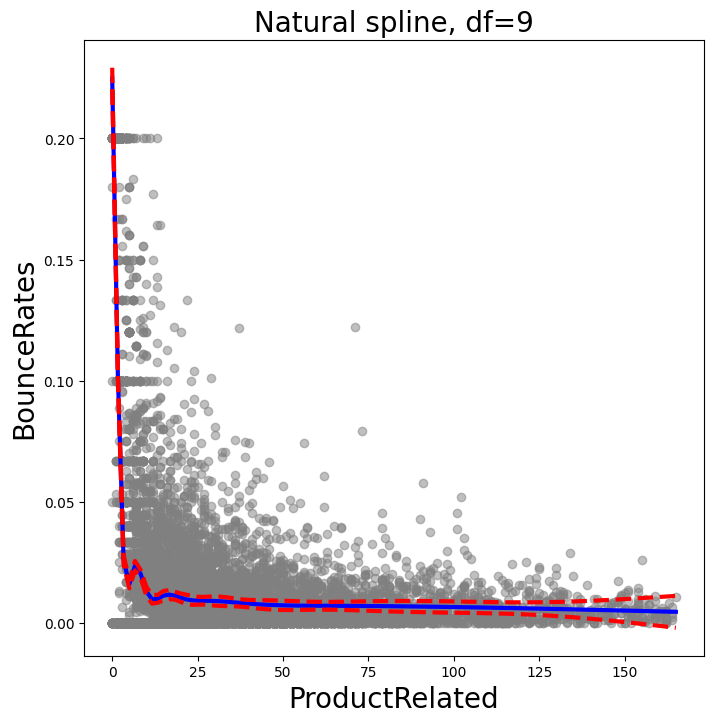

In [364]:
plot_data_fit(Prod_df,
              ns_Prod_9,
              'Natural spline, df=9');

In [365]:
ns_Prod_16 = MS([ns('ProductRelated', df=16)]).fit(X_train)
X_train_ns16 = ns_Prod_16.transform(X_train)
X_test_ns16 = ns_Prod_16.transform(X_test)
model_ns16 = sm.OLS(y_train, X_train_ns16).fit()

y_train_pred_ns16 = model_ns16.predict(X_train_ns16)
y_test_pred_ns16 = model_ns16.predict(X_test_ns16)

print("Natural Spline with df=16:")
print("Training Set:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred_ns16):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred_ns16):.4f}")
print("Test Set:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred_ns16):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred_ns16):.4f}\n")


Natural Spline with df=16:
Training Set:
MSE: 0.0012
R²: 0.4987
Test Set:
MSE: 0.0012
R²: 0.5311



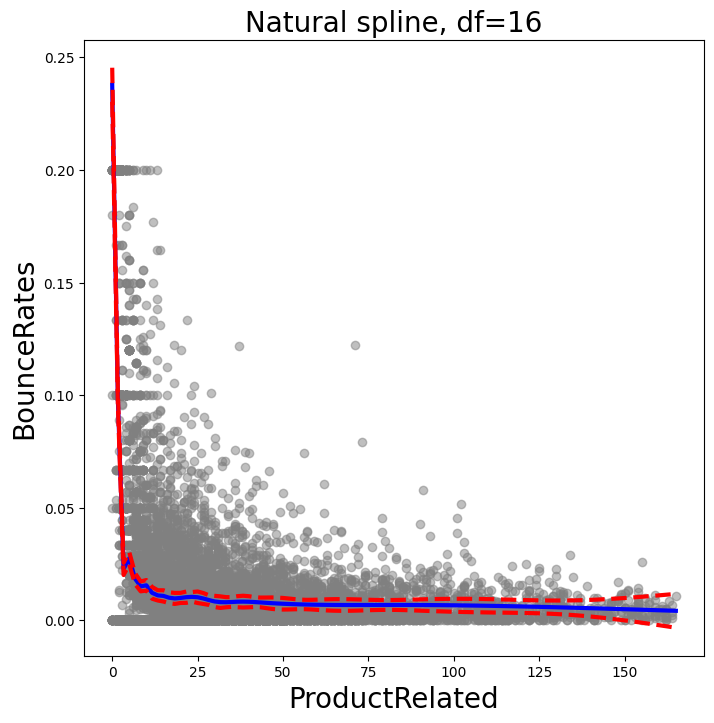

In [366]:
plot_data_fit(Prod_df,
              ns_Prod_16,
              'Natural spline, df=16');

In [367]:
ns_Prod_22 = MS([ns('ProductRelated', df=22)]).fit(X_train)
X_train_ns22 = ns_Prod_22.transform(X_train)
X_test_ns22 = ns_Prod_22.transform(X_test)
model_ns22 = sm.OLS(y_train, X_train_ns22).fit()

y_train_pred_ns22 = model_ns22.predict(X_train_ns22)
y_test_pred_ns22 = model_ns22.predict(X_test_ns22)

print("Natural Spline with df=22:")
print("Training Set:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred_ns22):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred_ns22):.4f}")
print("Test Set:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred_ns22):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred_ns22):.4f}")


Natural Spline with df=22:
Training Set:
MSE: 0.0011
R²: 0.5444
Test Set:
MSE: 0.0011
R²: 0.5708


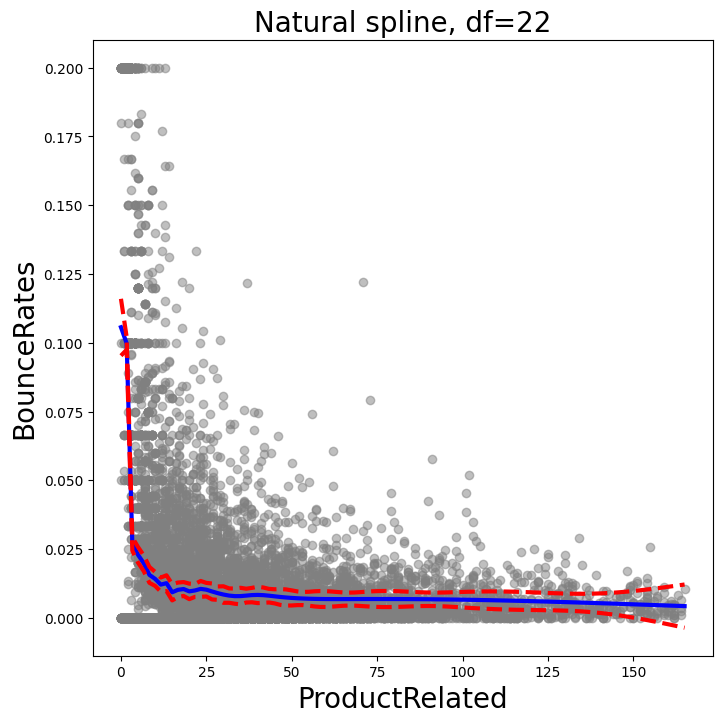

In [368]:
plot_data_fit(Prod_df,
              ns_Prod_22,
              'Natural spline, df=22');

**Summary**:I tried Basis-Spline and Natural-Spline with the same predictor `ProductRelated` and target `BounceRates` as in the previous polynomial regression to check if there was any improvement in the model. Based on the results from both the training and test sets, I found that Basis-Spline and Natural-Spline performed similarly, showing improvements in model performance as the degrees of freedom (df) increased from 9 to 16 to 22.

I believe this improvement is due to the fact that the complexity of the data is still much higher than what these spline fits can capture, suggesting that the model might still be in an underfitting state. Overall, the performance is moderate. Given that the data is noisy (with many outliers and complex relationships), this result is acceptable. At least compared to the previous polynomial regression, there has been a significant improvement.

#Part 2: Trees and SVM

In [370]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestClassifier as RF,
      GradientBoostingClassifier as GBC)
from ISLP.bart import BART
from sklearn.metrics import roc_curve, roc_auc_score

## Fitting Classification Trees
Continue using the previous dataset(especially in LDA and logistic regression), with the dependent variable as Revenue (binary classification), to facilitate comparison with the previous logistic regression and LDA.

In [371]:
X1.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0         0.20       0.20         0.0         0.0                 1        1   
1         0.00       0.10         0.0         0.0                 2        2   
2         0.20       0.20         0.0         0.0                 4        1   
3         0.05       0.14         0.0         0.0                 3        2   
4         0.02       0.05         0.0         0.0                 3        3   

   Region  TrafficType  Weekend  Revenue  Other  Returning_Visitor  
0       1            1        0        0      0                  1  
1       1            2        0        0      0                  1  
2       9            3        0        0      0                  1  
3       2            4        0        0      0                  1  
4       1            4        1        0      0                  1

In [372]:
model = MS(X1.columns.drop('Revenue'), intercept=False)
D = model.fit_transform(X1)
feature_names = list(D.columns)
X = np.asarray(D)
Revenue = X1.Revenue

In [373]:
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=6625)
clf.fit(X, Revenue)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=6625)

In [374]:
accuracy_score(Revenue, clf.predict(X))

0.8917274939172749

In [375]:
resid_dev = np.sum(log_loss(Revenue, clf.predict_proba(X)))
resid_dev

0.2535758319248905

Display graph

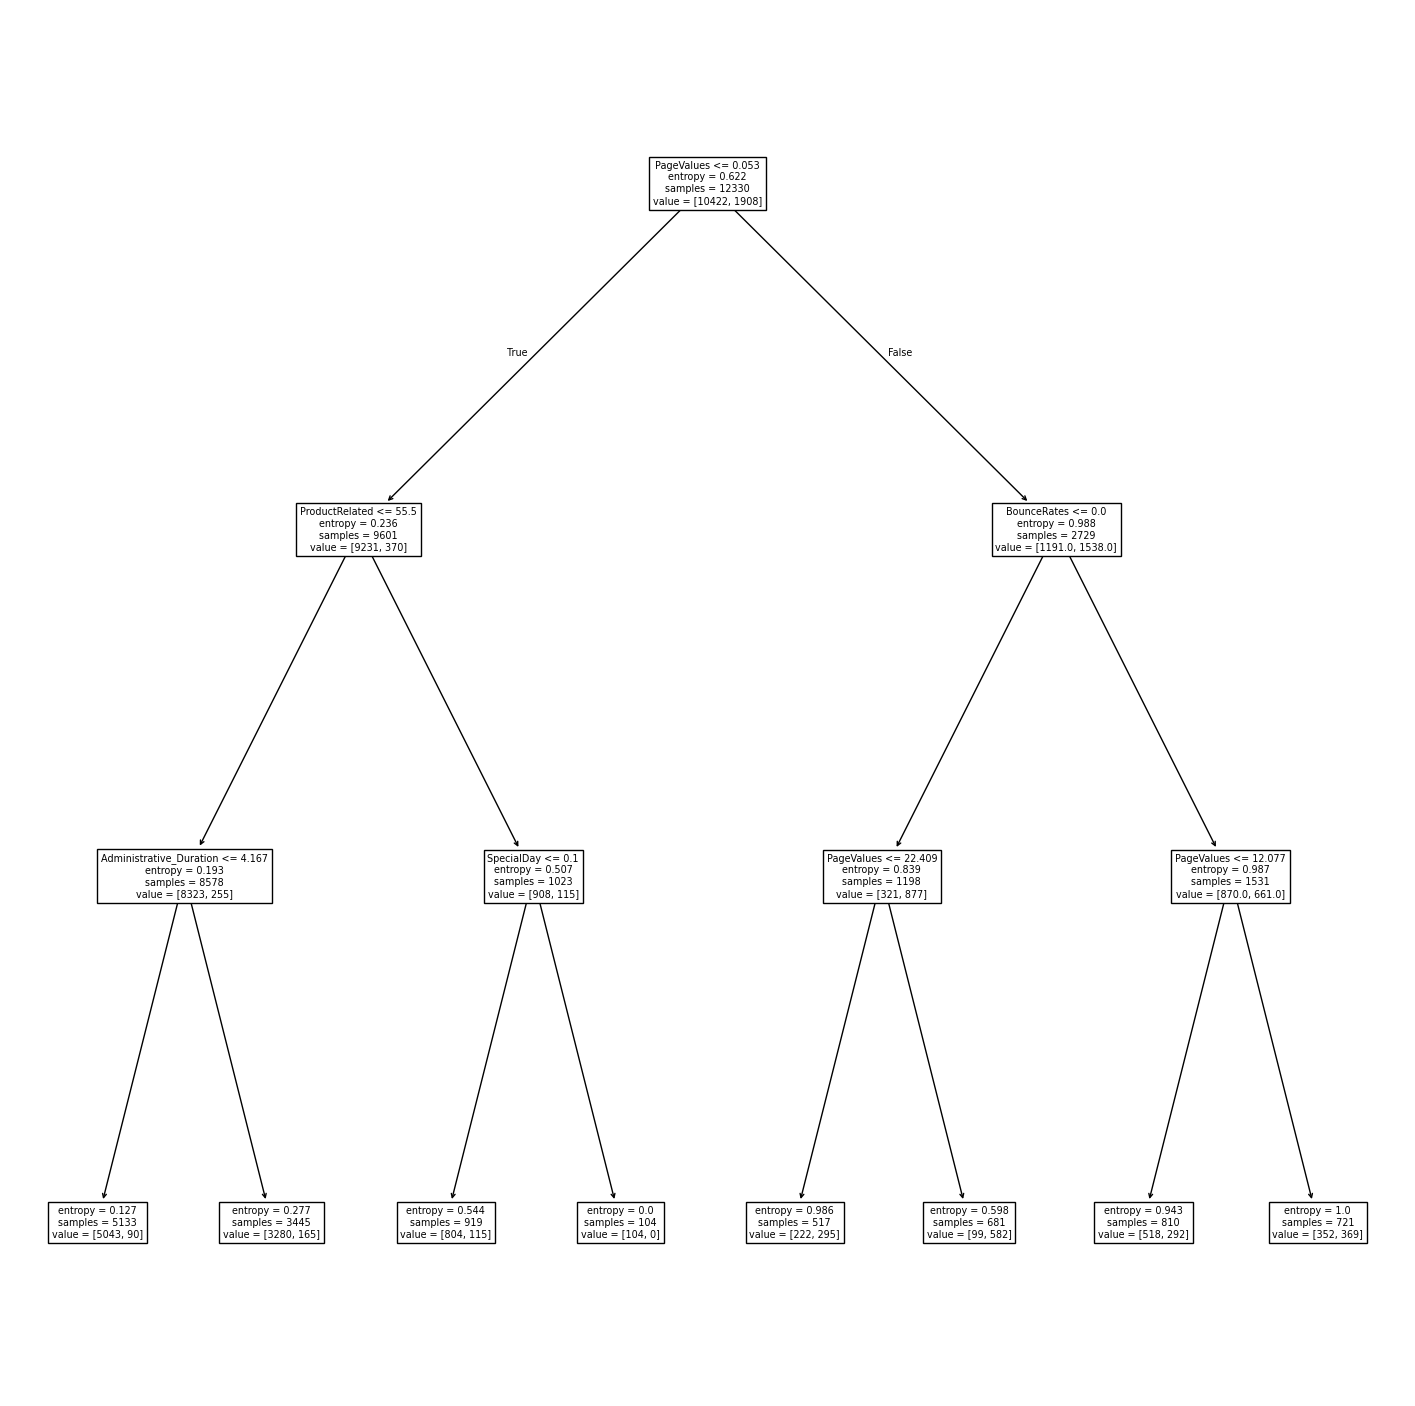

In [376]:
ax = subplots(figsize=(18,18))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

The most important indicator of `Revenue` appears to be `PageValues`.


In [377]:
print(export_text(clf,
                  feature_names=feature_names,
                  show_weights=True))

|--- PageValues <= 0.05
|   |--- ProductRelated <= 55.50
|   |   |--- Administrative_Duration <= 4.17
|   |   |   |--- weights: [5043.00, 90.00] class: 0
|   |   |--- Administrative_Duration >  4.17
|   |   |   |--- weights: [3280.00, 165.00] class: 0
|   |--- ProductRelated >  55.50
|   |   |--- SpecialDay <= 0.10
|   |   |   |--- weights: [804.00, 115.00] class: 0
|   |   |--- SpecialDay >  0.10
|   |   |   |--- weights: [104.00, 0.00] class: 0
|--- PageValues >  0.05
|   |--- BounceRates <= 0.00
|   |   |--- PageValues <= 22.41
|   |   |   |--- weights: [222.00, 295.00] class: 1
|   |   |--- PageValues >  22.41
|   |   |   |--- weights: [99.00, 582.00] class: 1
|   |--- BounceRates >  0.00
|   |   |--- PageValues <= 12.08
|   |   |   |--- weights: [518.00, 292.00] class: 0
|   |   |--- PageValues >  12.08
|   |   |   |--- weights: [352.00, 369.00] class: 1



We split the observations into a
training set and a test set, build the tree using the training set,
and evaluate its performance on the test data.

In [378]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=2000,
                              random_state=6625)
results = skm.cross_validate(clf,
                             D,
                             Revenue,
                             cv=validation)
results['test_score']


array([0.8955])

The model's complexity is appropriate and it fits the data well without leading to overfitting, so pruning is not necessary.

**Summary**:I tried using a decision tree and compared it with the logistic regression model from Part A. For this task, which seems relatively straightforward with a clear relationship, both models performed quite well in the binary classification of `Revenue`. Additionally, the most important indicator for predicting `Revenue` appears to be `PageValues`, as it played a significant role in the model's decision-making process.

## Bagging and Random Forests

Here we apply bagging and random forests to the `online_shoppers_intention` data

In [379]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                X1['Revenue'],
                                test_size=0.3,
                                random_state=6625)

In [380]:
bag_intention = RF(max_features=X_train.shape[1], random_state=6625)
bag_intention.fit(X_train, y_train)

RandomForestClassifier(max_features=17, random_state=6625)

The argument `max_features` indicates that all 17 predictors should
be considered for each split of the tree --- in other words, that
bagging should be done.

Draw Receiver Operating Characteristic Curve

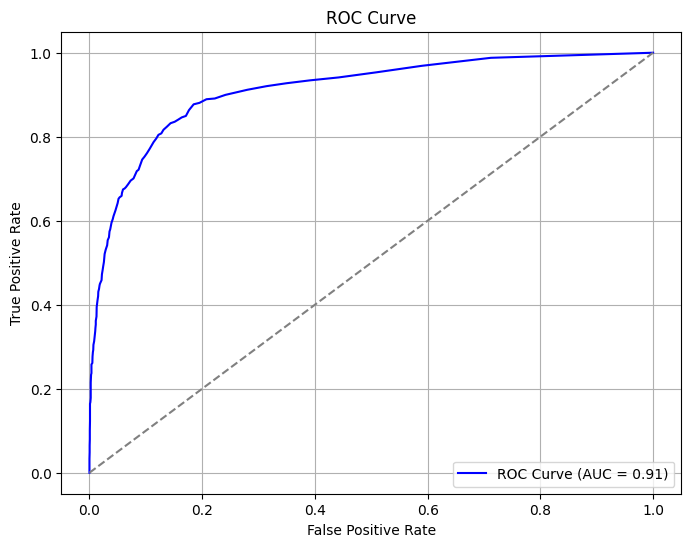

AUC: 0.9108


In [381]:
# Get predicted probabilities for the positive class (class 1)
y_prob = bag_intention.predict_proba(X_test)[:, 1]  # Probability for class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC: {auc:.4f}")

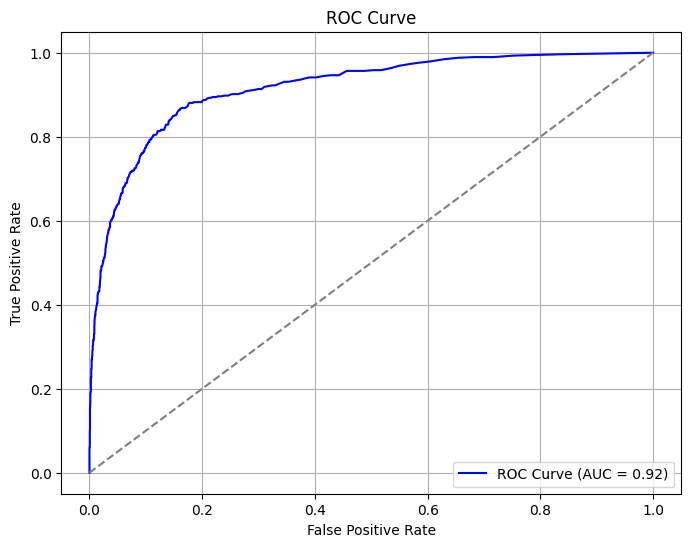

AUC: 0.9162


In [382]:
bag_intention = RF(max_features=X_train.shape[1],
                   n_estimators=500,
                   random_state=6625).fit(X_train, y_train)


y_prob = bag_intention.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)


auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


print(f"AUC: {auc:.4f}")

Increase the Estimators doesn't cause the overfitting.

In [383]:
RF_intention = RF(max_features=4,
               random_state=6625).fit(X_train, y_train)
y_hat_RF = RF_intention.predict(X_test)

accuracy = accuracy_score(y_test, y_hat_RF)

print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")

AUC: 0.9162
Accuracy: 0.9000


There is not much change(Actually these two AUC are same). Bagging and
random forests cannot overfit by
increasing the number of trees, but can underfit if the number is too small.

This indicates that both Random Forest and Bagging perform well on the test set, with Random Forest potentially performing slightly better.

Now we can view the
importance of each variable.

In [384]:
feature_imp = pd.DataFrame(
    {'importance':RF_intention.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

importance
PageValues                 0.368734
ProductRelated_Duration    0.100623
ExitRates                  0.095619
ProductRelated             0.082023
Administrative_Duration    0.063363
BounceRates                0.059601
Administrative             0.043511
TrafficType                0.036004
Region                     0.033099
Informational_Duration     0.031127
Browser                    0.020978
OperatingSystems           0.018994
Informational              0.018207
Weekend                    0.011140
Returning_Visitor          0.010777
SpecialDay                 0.005385
Other                      0.000814

**Summary**:
I moved on to my preferred methods, Bagging and Random Forest, and both performed very well on the binary classification task for `Revenue`. This indicates that ensemble methods, by combining multiple models, significantly improve prediction accuracy and robustness. Bagging helps reduce variance by averaging the results of multiple base models, while Random Forest further enhances this by introducing randomness in the feature selection, which reduces overfitting and improves generalization.

##Boosting

In [390]:
boost = GBC(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=6625)
boost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=5000,
                           random_state=6625)

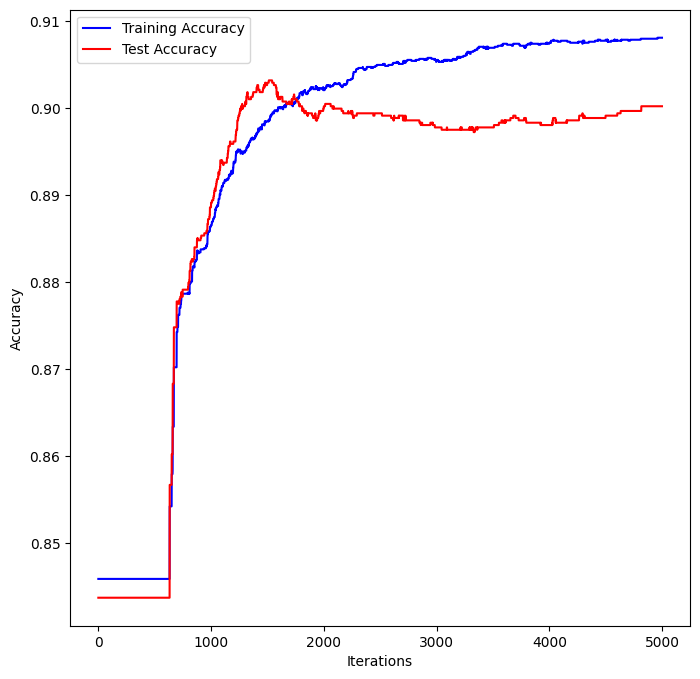

In [391]:
train_accuracy = np.zeros_like(boost.train_score_)
for idx, y_ in enumerate(boost.staged_predict(X_train)):
    train_accuracy[idx] = accuracy_score(y_train, y_)

test_accuracy = np.zeros_like(boost.train_score_)
for idx, y_ in enumerate(boost.staged_predict(X_test)):
    test_accuracy[idx] = accuracy_score(y_test, y_)

plot_idx = np.arange(boost.train_score_.shape[0])
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(plot_idx,
        train_accuracy,
        'b',
        label='Training Accuracy')
ax.plot(plot_idx,
        test_accuracy,
        'r',
        label='Test Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Iterations')
ax.legend()

In [392]:
y_hat_boost = boost.predict(X_test)
accuracy_score(y_test, y_hat_boost)

0.9002433090024331

Now try another value of learning rate

In [393]:
boost = GBC(n_estimators=5000,
                   learning_rate=0.2,
                   max_depth=3,
                   random_state=6625)
boost.fit(X_train, y_train)

y_hat_boost = boost.predict(X_test)
accuracy_score(y_test, y_hat_boost)

0.8926736955934036

In this case, using  𝜆=0.2  leads to a almost the same test Accuracy as when using  𝜆=0.001 .

**Summary**:
Boosting performs similarly to Random Forest, but it takes longer to run. In practice, Boosting is more prone to overfitting, and as the number of iterations increases, the plot shows slight overfitting.

##Support Vector Machines
The efficiency of SVM is really low, and for my dataset with over 12,000 samples, the processing time is even longer. Therefore, I chose to randomly sample 100 samples from the dataset as a representative subset to understand and familiarize myself with SVM. This will serve as a practice exercise.(
Even 100 samples can sometimes cause the program to crash. )

Also,manunally apply ovo to four seasons.(while drawing figures)
But use ovo method in SVM in kfold

In [ ]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
df_new = data.sample(n=100, random_state=6625)

df_new.reset_index(drop=True, inplace=True)

In [ ]:
df_new.head()

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              5   
1               0                 0.000000              0   
2               0                 0.000000              0   
3               4                39.583333              0   
4               0                 0.000000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   924.0              45              3198.186667   
1                     0.0               3                 8.000000   
2                     0.0              14               198.522150   
3                     0.0             115              2547.717986   
4                     0.0              15               593.750000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.004000   0.016364   32.417734         0.0   Oct                 2   
1     0.000000   0.066667    0.000000         0.0   Mar                 2   
2     0.001231   0.067972    0.000000         0.0   Mar                 1   
3     0.003478   0.007208   13.262214         0.0   Nov                 2   
4     0.000000   0.014286   92.939499         0.0   Nov                 1   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        6       4            2  Returning_Visitor        0        1  
1        2       6            1  Returning_Visitor        0        0  
2        1       9            1  Returning_Visitor        0        0  
3        2       4           10  Returning_Visitor        0        1  
4        8       3           11  Returning_Visitor        1        1

In [ ]:
Month_proportions = df_new['Month'].value_counts(normalize=True)
Month_proportions

Month
May     0.23
Nov     0.21
Mar     0.18
Dec     0.13
Oct     0.09
Feb     0.05
Jul     0.05
Sep     0.04
June    0.02
Name: proportion, dtype: float64

In [ ]:
month_abbr_to_season = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Autumn', 'Oct': 'Autumn',
    'Nov': 'Autumn', 'Dec': 'Winter'
}

df_new['Season'] = df_new['Month'].map(month_abbr_to_season)
Season_proportions = df_new['Season'].value_counts(normalize=True)
Season_proportions

Season
Spring    0.418367
Autumn    0.346939
Winter    0.183673
Summer    0.051020
Name: proportion, dtype: float64

We will use the function `RocCurveDisplay.from_estimator()` to
produce several ROC plots, using a shorthand `roc_curve`.

In [ ]:
roc_curve = RocCurveDisplay.from_estimator

###SVC


In [ ]:
seasons = df_new['Season'].unique()
season_combinations = list(combinations(seasons, 2))


season_datasets = {}

for combo in season_combinations:
    season_1, season_2 = combo
    dataset_name = f"{season_1}_{season_2}"
    season_datasets[dataset_name] = df_new[df_new['Season'].isin([season_1, season_2])]

print(season_datasets.keys())

dict_keys(['Autumn_Spring', 'Autumn_Winter', 'Autumn_Summer', 'Autumn_nan', 'Spring_Winter', 'Spring_Summer', 'Spring_nan', 'Winter_Summer', 'Winter_nan', 'Summer_nan'])


C = 10 means that the regularization strength is relatively high.

Processing dataset: Autumn_Spring


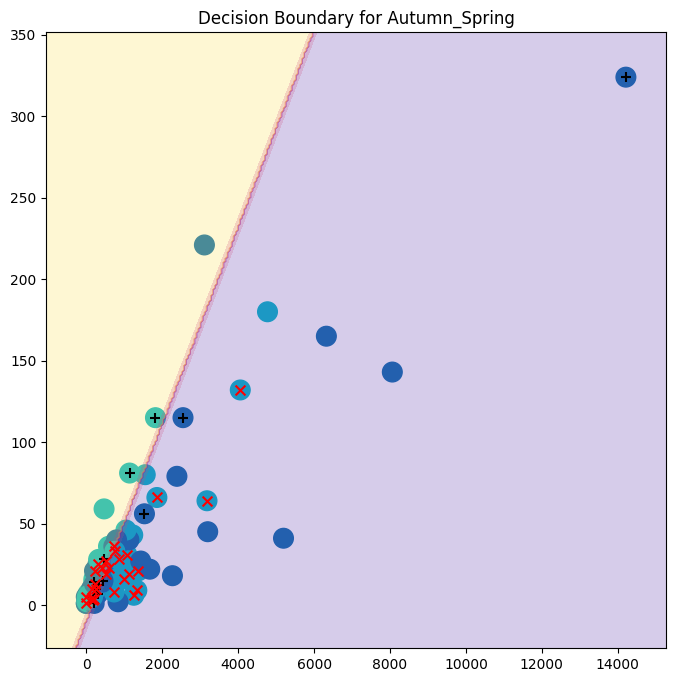

Processing dataset: Autumn_Winter


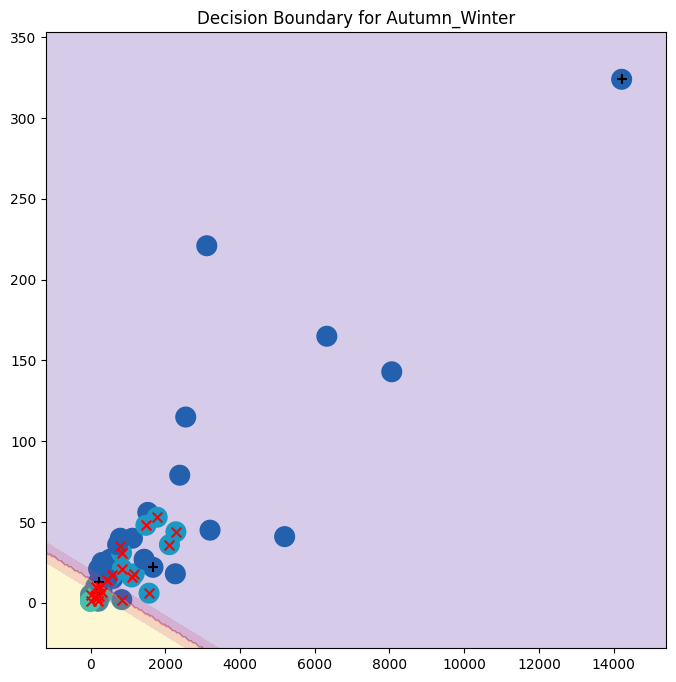

Processing dataset: Autumn_Summer


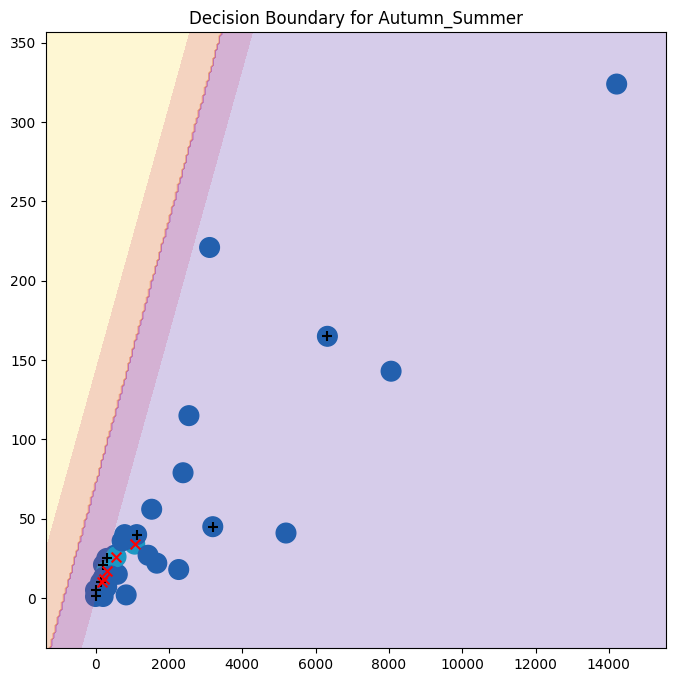

Processing dataset: Autumn_nan


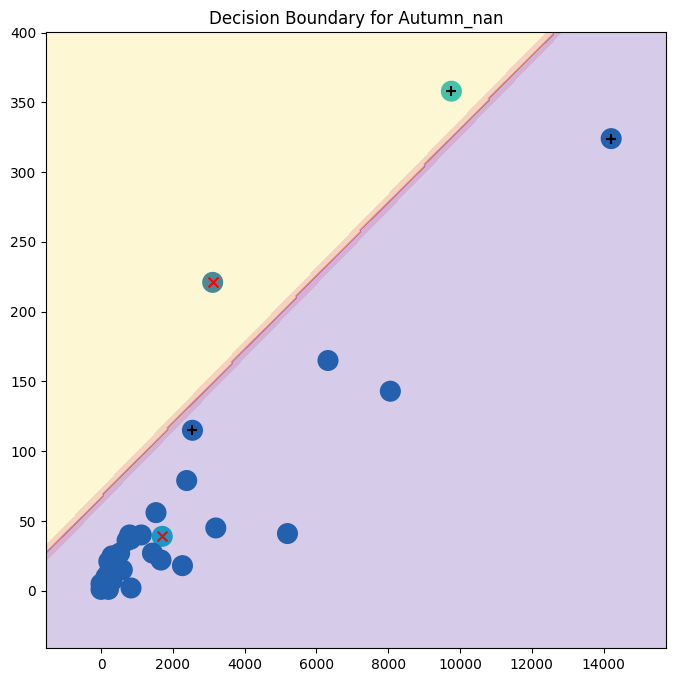

Processing dataset: Spring_Winter


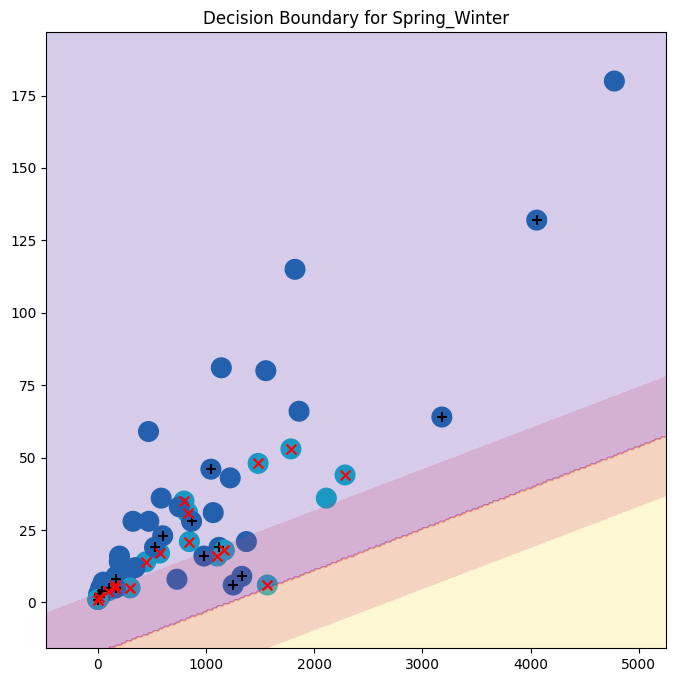

Processing dataset: Spring_Summer


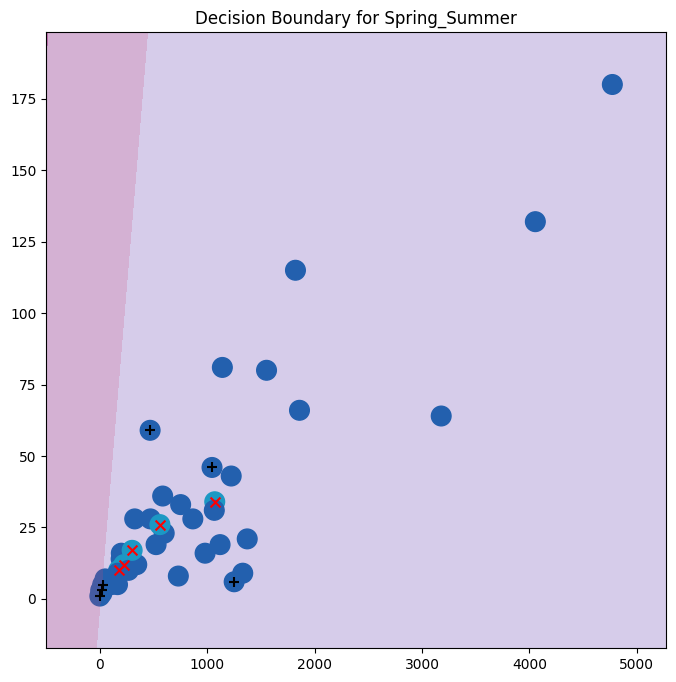

Processing dataset: Spring_nan


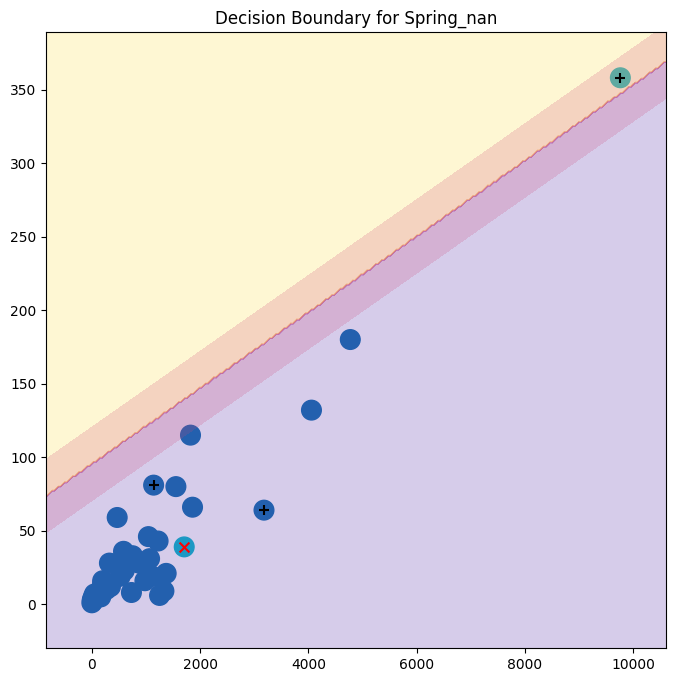

Processing dataset: Winter_Summer


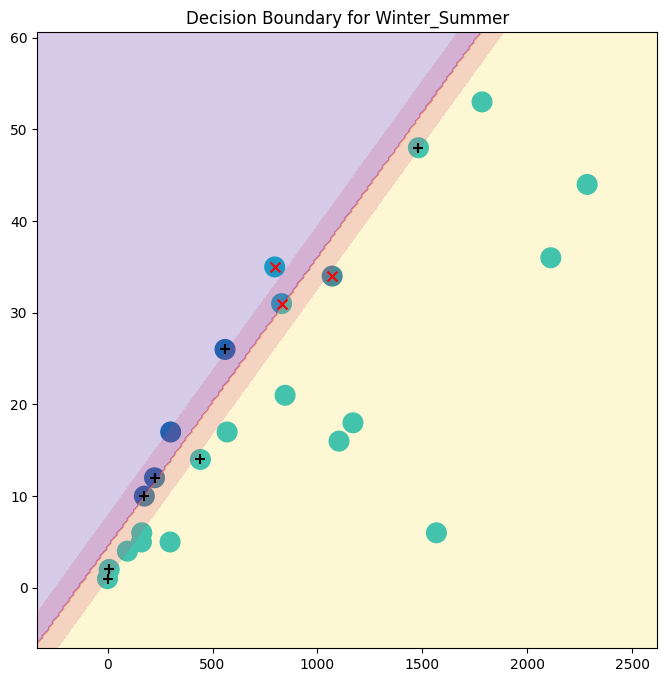

Processing dataset: Winter_nan


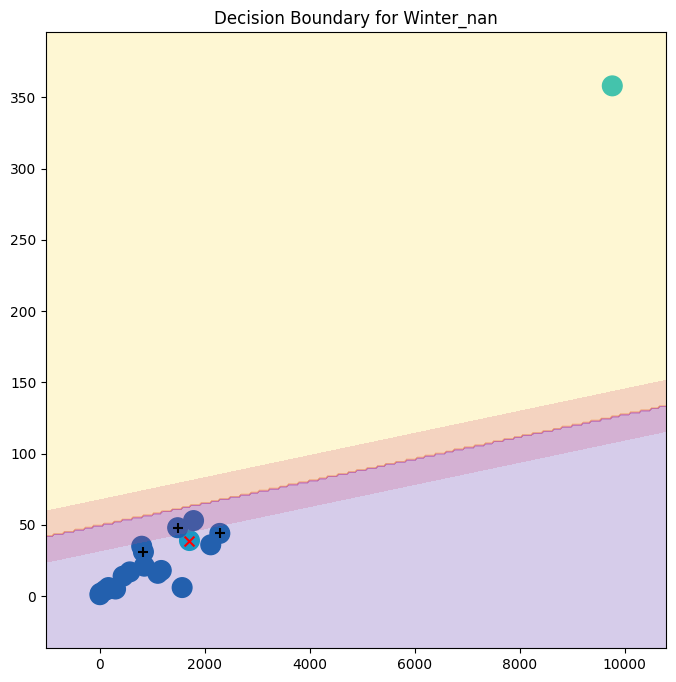

Processing dataset: Summer_nan


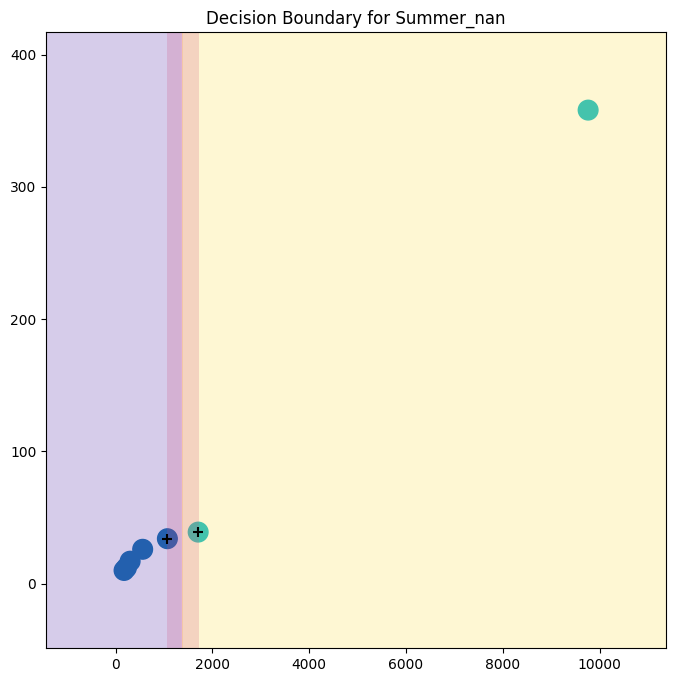

In [ ]:
for name, dataset in season_datasets.items():
    print(f"Processing dataset: {name}")


    y = dataset['Season'].to_numpy()
    X = dataset[['ProductRelated_Duration', 'ProductRelated']].to_numpy()


    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    svm_linear = SVC(C=10, kernel='linear')
    svm_linear.fit(X, y_encoded)


    fig, ax = plt.subplots(figsize=(8, 8))
    plot_svm(X, y_encoded, svm_linear, ax=ax)
    plt.title(f"Decision Boundary for {name}")
    plt.show()

Now randomly select 30 samples ,6 for test set

In [ ]:
df_new1 = data.sample(n=30, random_state=6625)

df_new1.reset_index(drop=True, inplace=True)

month_abbr_to_season = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Autumn', 'Oct': 'Autumn',
    'Nov': 'Autumn', 'Dec': 'Winter'
}

df_new1['Season'] = df_new1['Month'].map(month_abbr_to_season)
df_new1 = df_new1.dropna()
Season_proportions = df_new1['Season'].value_counts(normalize=True)
print(Season_proportions)
df_new1.shape

Season
Spring    0.433333
Autumn    0.266667
Winter    0.200000
Summer    0.100000
Name: proportion, dtype: float64


(30, 19)

In [ ]:
X = df_new1[['ProductRelated_Duration', 'ProductRelated']]
y = df_new1['Season']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=6625, stratify=y
)


print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Training set size: 24 samples
Test set size: 6 samples


In [ ]:
kfold = KFold(5, random_state=6625, shuffle=True)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


svm_linear_ovo = SVC(kernel='linear', decision_function_shape='ovo')


grid = GridSearchCV(
    svm_linear_ovo,
    param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
    refit=True,
    cv=kfold,
    scoring='accuracy'
)


grid.fit(X_train, y_train_encoded)


print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.001}


Above shown the C = 0.001 works best

In [ ]:
grid.cv_results_[('mean_test_score')]


array([0.55, 0.47, 0.38, 0.38, 0.38, 0.42, 0.37])

In [ ]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
y_test_encoded = label_encoder.fit_transform(y_test)
confusion_table(y_test_hat, y_test_encoded)


Truth      0  1  2
Predicted         
0          1  0  0
1          1  3  1
2          0  0  0


The above test should have one missing quarter of data, which is unavoidable. The efficiency of SVC is too low, so we had to choose a very small dataset.

**Summary**: SVC was by far the method with the longest runtime and the lowest efficiency. My task involved dividing the `Month` variable into four quarters to create a new feature, then applying SVC for one-vs-one (OVO) classification. In fact, I had to manually implement the OVO strategy instead of using SVC's built-in OVO mode, as the latter would cause the program to crash by occupying all available RAM. I could only randomly select a small subset of samples for the training and test sets. The performance of this method was also not great, with a test accuracy of 0.667, but only having just 6 samples in the test set. If more samples were added, the process would take an extremely long time. The running time of this SVC model has convinced me to avoid using it in the future when better alternatives are available.

### SVM
In this attempt, I used a different dataset related to wine classification, where I manually divided the data into three classes and tried to predict the classification using two independent variables: 'pH' and 'free sulfur dioxide'. The results don't seem very promising. After analyzing the situation, I found that SVM is not effective at establishing decision boundaries for such mixed, imbalanced multi-class data (where one class clearly outweighs the sum of the other classes).

Additionally, for these three classes, I still used the One-Versus-One (OvO) approach.

In [ ]:
data1 = pd.read_csv('winequality-red.csv')

In [ ]:
data1.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [ ]:
data1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
data1['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
conditions = [
    (data1['quality'].isin([3, 4])),  # 3 and 4 are 'low'
    (data1['quality'].isin([5, 6])),  # 5 and 6 are 'medium'
    (data1['quality'].isin([7, 8]))   # 7 and 8 are 'high'
]


choices = ['low', 'medium', 'high']


data1['quality_label'] = np.select(conditions, choices, default='unknown')


In [ ]:
data1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_label  
0      9.4        5        medium  
1      9.8        5        medium  
2      9.8        5        medium  
3      9.8        6        medium  
4      9.4        5        medium

In [ ]:
df_new2 = data1.sample(n=1000, random_state=6625)

df_new2.reset_index(drop=True, inplace=True)

In [ ]:

Train_set, Test_set = train_test_split(
    df_new2, test_size=0.2, random_state=6625, stratify=df_new2['quality_label']
)
Train_set.shape

(800, 13)

In [ ]:
quality_labels = Train_set['quality_label'].unique()
quality_combinations = list(combinations(quality_labels, 2))


Train_datasets = {}

for combo in quality_combinations:
    quality_1, quality_2 = combo
    dataset_name = f"{quality_1}_{quality_2}"
    Train_datasets[dataset_name] = Train_set[Train_set['quality_label'].isin([quality_1, quality_2])]

print(Train_datasets.keys())

dict_keys(['medium_high', 'medium_low', 'high_low'])


Processing dataset: medium_high


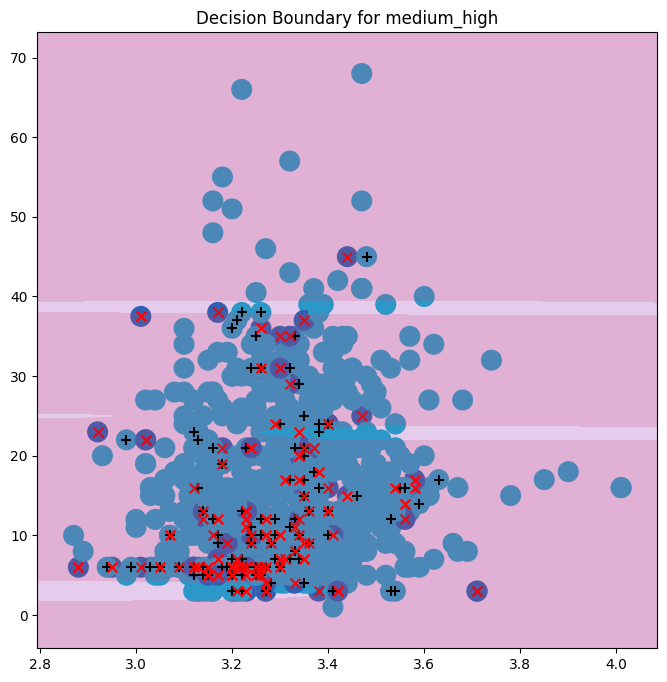

Processing dataset: medium_low


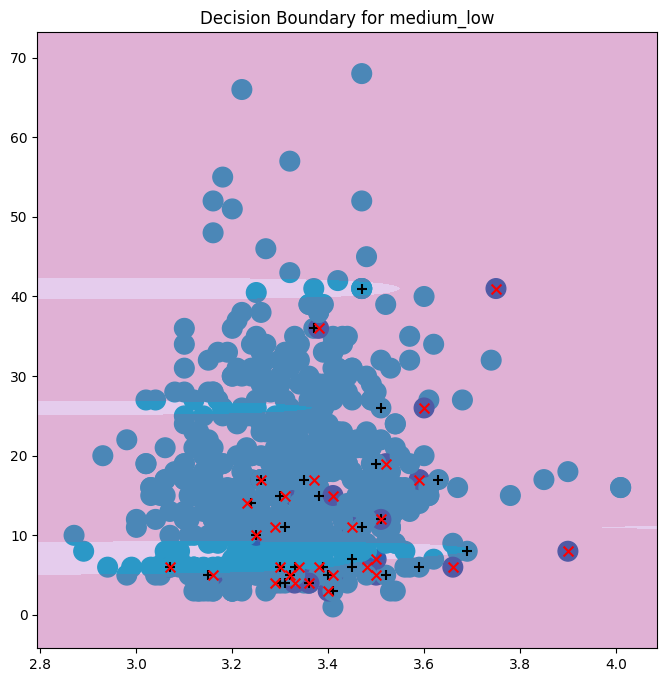

Processing dataset: high_low


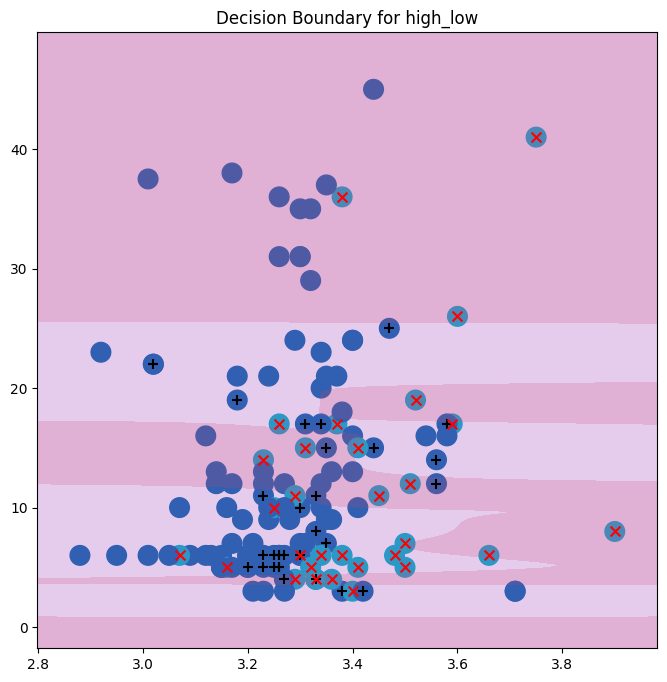

In [ ]:
for name, dataset in Train_datasets.items():
    print(f"Processing dataset: {name}")


    y = dataset['quality_label'].to_numpy()
    X = dataset[['pH', 'free sulfur dioxide']].to_numpy()


    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    svm_rbf = SVC(kernel="rbf", gamma=1, C=0.000001)
    svm_rbf.fit(X, y_encoded)

    fig, ax = subplots(figsize=(8,8))
    plot_svm(X, y_encoded, svm_rbf, ax=ax)
    plt.title(f"Decision Boundary for {name}")
    plt.show()


In [ ]:
X_train = Train_set[['pH', 'free sulfur dioxide']]
y_train = Train_set['quality_label']
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
svm_rbf = SVC(kernel="rbf", decision_function_shape='ovr')
kfold = skm.KFold(5,
                  random_state=6625,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1,1,10,100,1000],
                         'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(X_train, y_train_encoded)
grid.best_params_


{'C': 0.1, 'gamma': 0.5}

Above shown that 'C': 0.1, 'gamma': 0.5 should be the best choice

In [ ]:
X_test = Test_set[['pH', 'free sulfur dioxide']]
y_test = Test_set['quality_label']
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
best_svm = grid.best_estimator_

y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test_encoded)

Truth       0  1    2
Predicted            
0           0  0    0
1           0  0    0
2          26  8  166

In [ ]:
accuracy = accuracy_score(y_hat_test, y_test_encoded)
accuracy

0.83

**Summary**:
I switched to a different dataset, the one related to wine, and attempted to manually categorize the `quality` variable into three classes. I used the radial basis function (RBF) kernel for the SVM model, with the predictors being `pH` and `free sulfur dioxide`. However, the results were not satisfactory. The predictors seemed to be quite dense, and there was significant overlap between the classes. In the SVM plot, no clear boundary or distinction between the classes appeared, which highlighted the limitations of this model.

Additionally, the imbalance in the target variable categories played a major role in the poor performance. One class dominated the others, leading SVM to predict all samples in the test set as belonging to that dominant class. This issue with class imbalance is an important factor to address and improve in future modeling efforts.

#Part 3 Neural Nets

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
SEED = 6625
torch.manual_seed(SEED)
# Define the transformations

transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize data to range [-1, 1]
])
# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders with a fixed seed for reproducible shuffling
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, worker_init_fn=lambda _: torch.manual_seed(SEED))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

# Confirming the setup
print(f"Number of training samples: {len(train_loader.dataset)}")
print(f"Number of testing samples: {len(test_loader.dataset)}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 20.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 624kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.56MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.28MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Number of training samples: 60000
Number of testing samples: 10000


In [ ]:
# Mapping the labels for the MNIST dataset -- later we'll see that this using the "keras to_categorical" method as discussed in class
labels_map = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4",
    5: "5", 6: "6", 7: "7", 8: "8", 9: "9"
}

##3 models using the 'sigmoid'  activation function

Epoch 1, Batch 100, Loss: 2.3034
Epoch 1, Batch 200, Loss: 2.3033
Epoch 1, Batch 300, Loss: 2.3019
Epoch 1, Batch 400, Loss: 2.3005
Epoch 2, Batch 100, Loss: 2.3002
Epoch 2, Batch 200, Loss: 2.2998
Epoch 2, Batch 300, Loss: 2.2966
Epoch 2, Batch 400, Loss: 2.2954
Epoch 3, Batch 100, Loss: 2.2909
Epoch 3, Batch 200, Loss: 2.2849
Epoch 3, Batch 300, Loss: 2.2750
Epoch 3, Batch 400, Loss: 2.2562
Epoch 4, Batch 100, Loss: 2.1272
Epoch 4, Batch 200, Loss: 1.9433
Epoch 4, Batch 300, Loss: 1.7541
Epoch 4, Batch 400, Loss: 1.5713
Epoch 5, Batch 100, Loss: 1.3108
Epoch 5, Batch 200, Loss: 1.1963
Epoch 5, Batch 300, Loss: 1.0797
Epoch 5, Batch 400, Loss: 0.9953
Finished Training. Final Training Accuracy: 64.32%
Accuracy on test set: 72.08%


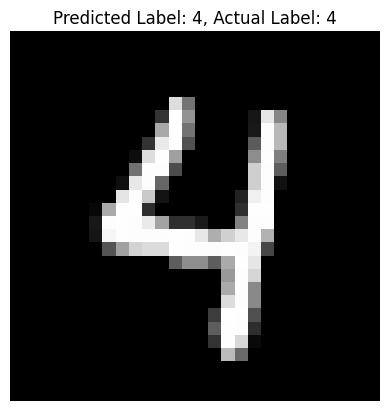

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc2 = nn.Linear(256 , 96)
        self.fc4 = nn.Linear(96 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.sigmoid(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.sigmoid(self.fc2(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = torch.sigmoid(self.fc4(x))
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


Epoch 1, Batch 100, Loss: 2.2937
Epoch 1, Batch 200, Loss: 2.2589
Epoch 1, Batch 300, Loss: 2.1624
Epoch 1, Batch 400, Loss: 1.9090
Epoch 2, Batch 100, Loss: 1.3036
Epoch 2, Batch 200, Loss: 1.0752
Epoch 2, Batch 300, Loss: 0.9332
Epoch 2, Batch 400, Loss: 0.8232
Epoch 3, Batch 100, Loss: 0.6759
Epoch 3, Batch 200, Loss: 0.6089
Epoch 3, Batch 300, Loss: 0.5754
Epoch 3, Batch 400, Loss: 0.5077
Epoch 4, Batch 100, Loss: 0.4579
Epoch 4, Batch 200, Loss: 0.4433
Epoch 4, Batch 300, Loss: 0.4151
Epoch 4, Batch 400, Loss: 0.4161
Epoch 5, Batch 100, Loss: 0.3862
Epoch 5, Batch 200, Loss: 0.3749
Epoch 5, Batch 300, Loss: 0.3521
Epoch 5, Batch 400, Loss: 0.3500
Finished Training. Final Training Accuracy: 89.95%
Accuracy on test set: 90.72%


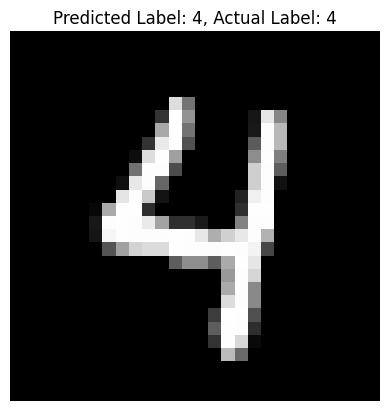

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 96) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc4 = nn.Linear(96 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.sigmoid(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.sigmoid(self.fc4(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


Epoch 1, Batch 100, Loss: 2.3042
Epoch 1, Batch 200, Loss: 2.3031
Epoch 1, Batch 300, Loss: 2.3026
Epoch 1, Batch 400, Loss: 2.3025
Epoch 2, Batch 100, Loss: 2.2994
Epoch 2, Batch 200, Loss: 2.3000
Epoch 2, Batch 300, Loss: 2.3005
Epoch 2, Batch 400, Loss: 2.2991
Epoch 3, Batch 100, Loss: 2.2976
Epoch 3, Batch 200, Loss: 2.2955
Epoch 3, Batch 300, Loss: 2.2934
Epoch 3, Batch 400, Loss: 2.2900
Epoch 4, Batch 100, Loss: 2.2790
Epoch 4, Batch 200, Loss: 2.2626
Epoch 4, Batch 300, Loss: 2.2223
Epoch 4, Batch 400, Loss: 2.1132
Epoch 5, Batch 100, Loss: 1.8218
Epoch 5, Batch 200, Loss: 1.7142
Epoch 5, Batch 300, Loss: 1.6094
Epoch 5, Batch 400, Loss: 1.4724
Finished Training. Final Training Accuracy: 42.40%
Accuracy on test set: 51.98%


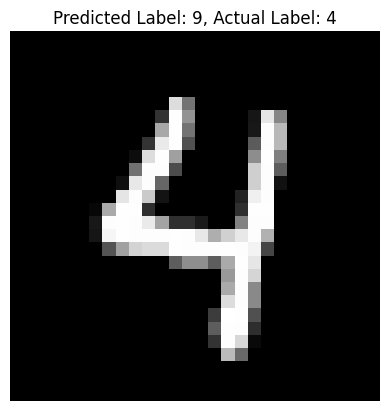

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc2 = nn.Linear(128 , 64)
        self.fc4 = nn.Linear(64 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.sigmoid(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.sigmoid(self.fc2(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = torch.sigmoid(self.fc4(x))
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


##3 models using the 'Relu'  activation function

Epoch 1, Batch 100, Loss: 1.8011
Epoch 1, Batch 200, Loss: 0.7600
Epoch 1, Batch 300, Loss: 0.4535
Epoch 1, Batch 400, Loss: 0.3525
Epoch 2, Batch 100, Loss: 0.2791
Epoch 2, Batch 200, Loss: 0.2707
Epoch 2, Batch 300, Loss: 0.2372
Epoch 2, Batch 400, Loss: 0.2006
Epoch 3, Batch 100, Loss: 0.1923
Epoch 3, Batch 200, Loss: 0.1521
Epoch 3, Batch 300, Loss: 0.1605
Epoch 3, Batch 400, Loss: 0.1511
Epoch 4, Batch 100, Loss: 0.1430
Epoch 4, Batch 200, Loss: 0.1253
Epoch 4, Batch 300, Loss: 0.1380
Epoch 4, Batch 400, Loss: 0.1179
Epoch 5, Batch 100, Loss: 0.1020
Epoch 5, Batch 200, Loss: 0.1086
Epoch 5, Batch 300, Loss: 0.1072
Epoch 5, Batch 400, Loss: 0.0979
Finished Training. Final Training Accuracy: 96.80%
Accuracy on test set: 96.29%


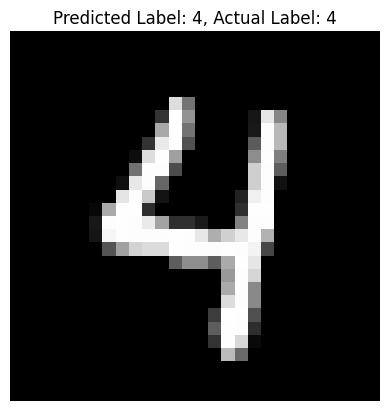

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc2 = nn.Linear(256 , 96)
        self.fc4 = nn.Linear(96 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.relu(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.relu(self.fc2(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = torch.relu(self.fc4(x))
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


Epoch 1, Batch 100, Loss: 1.3588
Epoch 1, Batch 200, Loss: 0.5389
Epoch 1, Batch 300, Loss: 0.4003
Epoch 1, Batch 400, Loss: 0.3267
Epoch 2, Batch 100, Loss: 0.2594
Epoch 2, Batch 200, Loss: 0.2590
Epoch 2, Batch 300, Loss: 0.2396
Epoch 2, Batch 400, Loss: 0.2227
Epoch 3, Batch 100, Loss: 0.1832
Epoch 3, Batch 200, Loss: 0.1818
Epoch 3, Batch 300, Loss: 0.1862
Epoch 3, Batch 400, Loss: 0.1625
Epoch 4, Batch 100, Loss: 0.1384
Epoch 4, Batch 200, Loss: 0.1446
Epoch 4, Batch 300, Loss: 0.1507
Epoch 4, Batch 400, Loss: 0.1316
Epoch 5, Batch 100, Loss: 0.1231
Epoch 5, Batch 200, Loss: 0.1178
Epoch 5, Batch 300, Loss: 0.1232
Epoch 5, Batch 400, Loss: 0.1185
Finished Training. Final Training Accuracy: 96.39%
Accuracy on test set: 96.19%


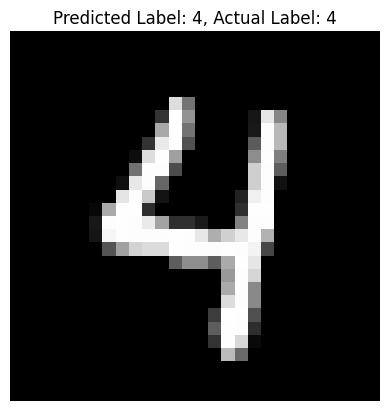

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 96) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc4 = nn.Linear(96 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.relu(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.relu(self.fc4(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


Epoch 1, Batch 100, Loss: 1.8736
Epoch 1, Batch 200, Loss: 0.9277
Epoch 1, Batch 300, Loss: 0.5778
Epoch 1, Batch 400, Loss: 0.3821
Epoch 2, Batch 100, Loss: 0.2927
Epoch 2, Batch 200, Loss: 0.2748
Epoch 2, Batch 300, Loss: 0.2483
Epoch 2, Batch 400, Loss: 0.2323
Epoch 3, Batch 100, Loss: 0.1967
Epoch 3, Batch 200, Loss: 0.1881
Epoch 3, Batch 300, Loss: 0.1559
Epoch 3, Batch 400, Loss: 0.1769
Epoch 4, Batch 100, Loss: 0.1446
Epoch 4, Batch 200, Loss: 0.1455
Epoch 4, Batch 300, Loss: 0.1404
Epoch 4, Batch 400, Loss: 0.1361
Epoch 5, Batch 100, Loss: 0.1238
Epoch 5, Batch 200, Loss: 0.1146
Epoch 5, Batch 300, Loss: 0.1028
Epoch 5, Batch 400, Loss: 0.1144
Finished Training. Final Training Accuracy: 96.48%
Accuracy on test set: 94.62%


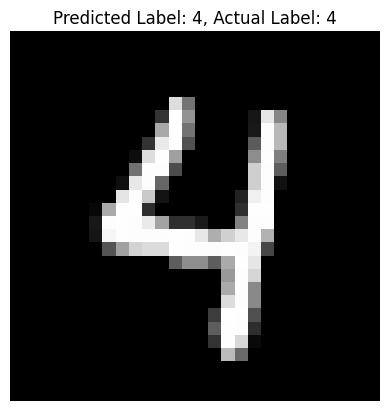

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc2 = nn.Linear(128 , 64)
        self.fc4 = nn.Linear(64 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.relu(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.relu(self.fc2(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = torch.relu(self.fc4(x))
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


##Select best topology type,Change learning rate
The [96, 32, 10] architecture with ReLU activation is recommended for its better generalization, lower risk of overfitting, minimal accuracy trade-off, and significantly reduced computational cost.

The [256, 96, 32, 10] architecture with ReLU activation is not selected because, despite its slightly higher accuracy (96.29% vs. 96.19%), it has a higher risk of overfitting due to its larger parameter size, requires significantly more computational resources (~215,000 parameters vs. ~10,000), and offers minimal improvement (only 0.10%) over the simpler [96, 32, 10] architecture with ReLU activation.


Now try three different learning rates,0.01, 0.001, 0.0001. Compare with original learning rate,which is 0.1.

Epoch 1, Batch 100, Loss: 2.2214
Epoch 1, Batch 200, Loss: 1.9332
Epoch 1, Batch 300, Loss: 1.5027
Epoch 1, Batch 400, Loss: 1.1206
Epoch 2, Batch 100, Loss: 0.7457
Epoch 2, Batch 200, Loss: 0.6231
Epoch 2, Batch 300, Loss: 0.5516
Epoch 2, Batch 400, Loss: 0.5033
Epoch 3, Batch 100, Loss: 0.4569
Epoch 3, Batch 200, Loss: 0.4221
Epoch 3, Batch 300, Loss: 0.4022
Epoch 3, Batch 400, Loss: 0.3990
Epoch 4, Batch 100, Loss: 0.3729
Epoch 4, Batch 200, Loss: 0.3763
Epoch 4, Batch 300, Loss: 0.3561
Epoch 4, Batch 400, Loss: 0.3511
Epoch 5, Batch 100, Loss: 0.3407
Epoch 5, Batch 200, Loss: 0.3514
Epoch 5, Batch 300, Loss: 0.3379
Epoch 5, Batch 400, Loss: 0.3295
Finished Training. Final Training Accuracy: 90.41%
Accuracy on test set: 91.10%


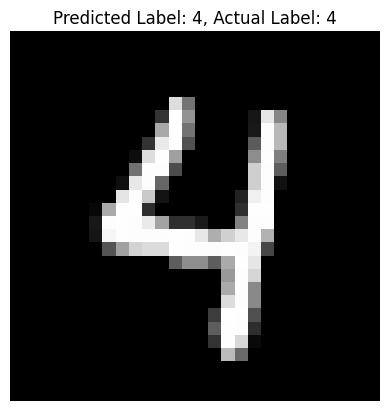

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 96) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc4 = nn.Linear(96 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.relu(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.relu(self.fc4(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


Epoch 1, Batch 100, Loss: 2.2991
Epoch 1, Batch 200, Loss: 2.2796
Epoch 1, Batch 300, Loss: 2.2598
Epoch 1, Batch 400, Loss: 2.2354
Epoch 2, Batch 100, Loss: 2.1969
Epoch 2, Batch 200, Loss: 2.1703
Epoch 2, Batch 300, Loss: 2.1411
Epoch 2, Batch 400, Loss: 2.1119
Epoch 3, Batch 100, Loss: 2.0534
Epoch 3, Batch 200, Loss: 2.0127
Epoch 3, Batch 300, Loss: 1.9750
Epoch 3, Batch 400, Loss: 1.9299
Epoch 4, Batch 100, Loss: 1.8553
Epoch 4, Batch 200, Loss: 1.8015
Epoch 4, Batch 300, Loss: 1.7532
Epoch 4, Batch 400, Loss: 1.7051
Epoch 5, Batch 100, Loss: 1.6150
Epoch 5, Batch 200, Loss: 1.5701
Epoch 5, Batch 300, Loss: 1.5098
Epoch 5, Batch 400, Loss: 1.4717
Finished Training. Final Training Accuracy: 60.16%
Accuracy on test set: 65.34%


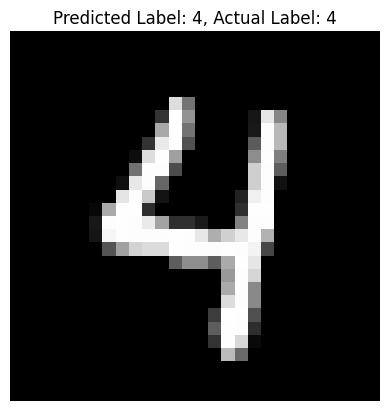

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 96) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc4 = nn.Linear(96 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.relu(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.relu(self.fc4(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


Epoch 1, Batch 100, Loss: 2.3140
Epoch 1, Batch 200, Loss: 2.3124
Epoch 1, Batch 300, Loss: 2.3130
Epoch 1, Batch 400, Loss: 2.3106
Epoch 2, Batch 100, Loss: 2.3081
Epoch 2, Batch 200, Loss: 2.3067
Epoch 2, Batch 300, Loss: 2.3057
Epoch 2, Batch 400, Loss: 2.3042
Epoch 3, Batch 100, Loss: 2.3026
Epoch 3, Batch 200, Loss: 2.3018
Epoch 3, Batch 300, Loss: 2.3013
Epoch 3, Batch 400, Loss: 2.2992
Epoch 4, Batch 100, Loss: 2.2980
Epoch 4, Batch 200, Loss: 2.2967
Epoch 4, Batch 300, Loss: 2.2961
Epoch 4, Batch 400, Loss: 2.2943
Epoch 5, Batch 100, Loss: 2.2917
Epoch 5, Batch 200, Loss: 2.2940
Epoch 5, Batch 300, Loss: 2.2919
Epoch 5, Batch 400, Loss: 2.2915
Finished Training. Final Training Accuracy: 11.77%
Accuracy on test set: 12.60%


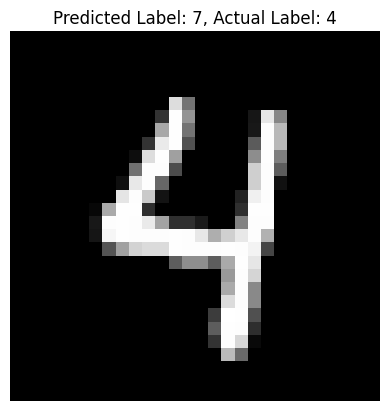

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 96) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc4 = nn.Linear(96 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.relu(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.relu(self.fc4(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


As expected, changing the learning rate without increasing the number of training epochs doesn't give enough time for the smaller learning rates to converge. Therefore, the best performance is still achieved with the previous default learning rate of 0.1.

##Try with different batch size 32, 64

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, worker_init_fn=lambda _: torch.manual_seed(SEED))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

Epoch 1, Batch 100, Loss: 1.5652
Epoch 1, Batch 200, Loss: 0.7213
Epoch 1, Batch 300, Loss: 0.5700
Epoch 1, Batch 400, Loss: 0.4599
Epoch 1, Batch 500, Loss: 0.4303
Epoch 1, Batch 600, Loss: 0.4104
Epoch 1, Batch 700, Loss: 0.3559
Epoch 1, Batch 800, Loss: 0.3204
Epoch 1, Batch 900, Loss: 0.3118
Epoch 1, Batch 1000, Loss: 0.3195
Epoch 1, Batch 1100, Loss: 0.2753
Epoch 1, Batch 1200, Loss: 0.2588
Epoch 1, Batch 1300, Loss: 0.2553
Epoch 1, Batch 1400, Loss: 0.2480
Epoch 1, Batch 1500, Loss: 0.1968
Epoch 1, Batch 1600, Loss: 0.2181
Epoch 1, Batch 1700, Loss: 0.2357
Epoch 1, Batch 1800, Loss: 0.2324
Epoch 2, Batch 100, Loss: 0.2017
Epoch 2, Batch 200, Loss: 0.1814
Epoch 2, Batch 300, Loss: 0.1878
Epoch 2, Batch 400, Loss: 0.1852
Epoch 2, Batch 500, Loss: 0.1650
Epoch 2, Batch 600, Loss: 0.1948
Epoch 2, Batch 700, Loss: 0.1767
Epoch 2, Batch 800, Loss: 0.1502
Epoch 2, Batch 900, Loss: 0.1751
Epoch 2, Batch 1000, Loss: 0.2078
Epoch 2, Batch 1100, Loss: 0.1611
Epoch 2, Batch 1200, Loss: 0.185

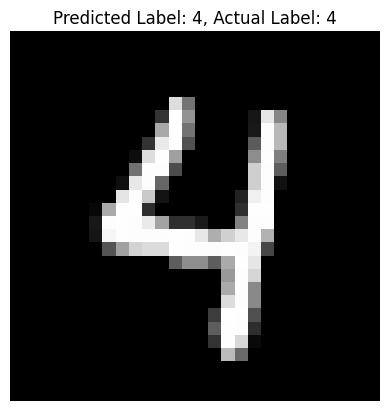

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 96) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc4 = nn.Linear(96 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.relu(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.relu(self.fc4(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()


In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, worker_init_fn=lambda _: torch.manual_seed(SEED))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Epoch 1, Batch 100, Loss: 1.3883
Epoch 1, Batch 200, Loss: 0.6230
Epoch 1, Batch 300, Loss: 0.4293
Epoch 1, Batch 400, Loss: 0.3812
Epoch 1, Batch 500, Loss: 0.3256
Epoch 1, Batch 600, Loss: 0.2861
Epoch 1, Batch 700, Loss: 0.2680
Epoch 1, Batch 800, Loss: 0.2705
Epoch 1, Batch 900, Loss: 0.2406
Epoch 2, Batch 100, Loss: 0.2212
Epoch 2, Batch 200, Loss: 0.2022
Epoch 2, Batch 300, Loss: 0.2175
Epoch 2, Batch 400, Loss: 0.1825
Epoch 2, Batch 500, Loss: 0.1913
Epoch 2, Batch 600, Loss: 0.1706
Epoch 2, Batch 700, Loss: 0.1637
Epoch 2, Batch 800, Loss: 0.1635
Epoch 2, Batch 900, Loss: 0.1613
Epoch 3, Batch 100, Loss: 0.1470
Epoch 3, Batch 200, Loss: 0.1392
Epoch 3, Batch 300, Loss: 0.1305
Epoch 3, Batch 400, Loss: 0.1407
Epoch 3, Batch 500, Loss: 0.1390
Epoch 3, Batch 600, Loss: 0.1308
Epoch 3, Batch 700, Loss: 0.1377
Epoch 3, Batch 800, Loss: 0.1354
Epoch 3, Batch 900, Loss: 0.1189
Epoch 4, Batch 100, Loss: 0.1133
Epoch 4, Batch 200, Loss: 0.1144
Epoch 4, Batch 300, Loss: 0.1180
Epoch 4, B

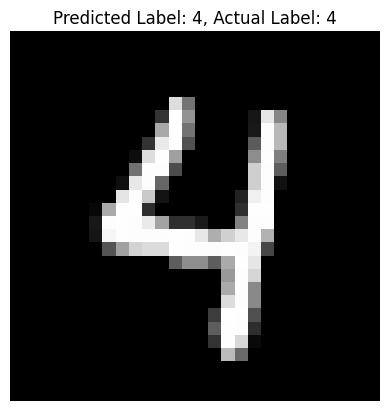

In [ ]:
#Here we define the model parameters -- the general strucutre as provided here will produce a fully connected network [28x28] --> 32 --> 16 --> 10
class MLP(nn.Module): #MLP stands for "Multi-Layer Perceptron"
    def __init__(self): #this initializes the structure of the network
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 96) # add or remove layer here so, fc1, fc2 and so on must be continuous [look fo the numbers]
        self.fc4 = nn.Linear(96 , 32)
        self.fc3 = nn.Linear(32, 10) ## 10 output features because MNIST has 10 target classes

    def forward(self, x): #this modifies the elements of the intial structure defined above
        x = x.view(-1, 28 * 28) #the array is sent in as a vector
        x = torch.relu(self.fc1(x)) ## Applying sigmoid activation for the first layer replace with 'relu'
        x = torch.relu(self.fc4(x)) ## Applying sigmoid activation for the second layer replace with 'relu'
        x = self.fc3(x) ## no modifications to the activation of the output layer
        return x

# Initializing the neural network
model = MLP()


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

# Calculate and print final training accuracy
final_training_accuracy = 100 * correct_train / total_train
print(f'Finished Training. Final Training Accuracy: {final_training_accuracy:.2f}%')

# Evaluating the model on the test set
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on test set: {test_accuracy:.2f}%')

# Visualizing a single prediction
image_index = 27
test_image, test_label = test_dataset[image_index]

with torch.no_grad():
    model.eval()
    output = model(test_image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

test_image_numpy = test_image.squeeze().numpy()

plt.imshow(test_image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {test_label}')
plt.axis('off')
plt.show()
